In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
import numpy as np

In [2]:
df = pd.read_csv("shopping_trends_updated1.csv")

In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [179]:
df["Color"].unique()

array(['Gray', 'Maroon', 'Turquoise', 'White', 'Charcoal', 'Silver',
       'Pink', 'Purple', 'Olive', 'Gold', 'Violet', 'Teal', 'Lavender',
       'Black', 'Green', 'Peach', 'Red', 'Cyan', 'Brown', 'Beige',
       'Orange', 'Indigo', 'Yellow', 'Magenta', 'Blue'], dtype=object)

In [305]:
df.describe()

,Unnamed: 0,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1949.500000,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,1125.977353,15.207589,23.685392,0.716223,14.447125
min,0.000000,1.000000,18.000000,20.000000,2.500000,1.000000
25%,974.750000,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1949.500000,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2924.250000,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3899.000000,3900.000000,70.000000,100.000000,5.000000,50.000000


In [75]:
df.describe(include='O')

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Preferred Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Credit Card,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,696,675,2223,2223,677,584


In [76]:
df.isnull().any()

Customer ID                 False
Age                         False
Gender                      False
Item Purchased              False
Category                    False
Purchase Amount (USD)       False
Location                    False
Size                        False
Color                       False
Season                      False
Review Rating               False
Subscription Status         False
Payment Method              False
Shipping Type               False
Discount Applied            False
Promo Code Used             False
Previous Purchases          False
Preferred Payment Method    False
Frequency of Purchases      False
dtype: bool

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              3900 non-null   int64  
 1   Customer ID             3900 non-null   int64  
 2   Age                     3900 non-null   int64  
 3   Gender                  3900 non-null   object 
 4   Item Purchased          3900 non-null   object 
 5   Category                3900 non-null   object 
 6   Purchase Amount (USD)   3900 non-null   int64  
 7   Location                3900 non-null   object 
 8   Size                    3900 non-null   object 
 9   Color                   3900 non-null   object 
 10  Season                  3900 non-null   object 
 11  Review Rating           3900 non-null   float64
 12  Subscription Status     3900 non-null   object 
 13  Shipping Type           3900 non-null   object 
 14  Discount Applied        3900 non-null   

In [78]:
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [307]:
df.head()

,Unnamed: 0,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,...,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Item Purchased_new,Age_group,location_new
0,0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,...,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,tops,50s,South
1,1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,...,Yes,Express,Yes,Yes,2,Cash,Fortnightly,tops,10-20s,Northeast
2,2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,...,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,bottoms,50s,Northeast
3,3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,...,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,shoes,10-20s,Northeast
4,4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,...,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,tops,40s,West


Numeric 컬럼 상관계수
피어슨, 스피어만 , 켄달 타우 모두 비슷하게 매우 낮은 값

In [80]:
df.corr(numeric_only=True)

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
Customer ID,1.000000,-0.004079,0.011048,0.001343,-0.039159
Age,-0.004079,1.000000,-0.010424,-0.021949,0.040445
Purchase Amount (USD),0.011048,-0.010424,1.000000,0.030776,0.008063
Review Rating,0.001343,-0.021949,0.030776,1.000000,0.004229
Previous Purchases,-0.039159,0.040445,0.008063,0.004229,1.000000


In [182]:
df.loc[:, ['Age', 'Purchase Amount (USD)', 'Review Rating']].corr(method='pearson')

,Age,Purchase Amount (USD),Review Rating
Age,1.000000,-0.010424,-0.021949
Purchase Amount (USD),-0.010424,1.000000,0.030776
Review Rating,-0.021949,0.030776,1.000000


Boolean 값 (Yes, No) / 성별 1, 0으로 치환

In [4]:
df1 = df.copy()

In [157]:
df1.loc[df['Discount Applied']== 'Yes', 'Discount Applied'] = 1
df1.loc[df['Promo Code Used']== 'Yes', 'Promo Code Used'] = 1

df1.loc[df['Discount Applied']== 'No', 'Discount Applied'] = 0
df1.loc[df['Promo Code Used']== 'No', 'Promo Code Used'] = 0


In [158]:
df1.loc[df['Gender']=='Male', 'Gender'] = 1
df1.loc[df['Gender']=='Female', 'Gender'] = 0 

In [34]:
df1.head()

,Unnamed: 0,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,...,Frequency of Purchases,Item Purchased_new,Age_group,location_new,Previous Purchases Score,Frequency Purchases Score,Total_Amount,Total_Purchases_Amount_Score,Total Score,Customer Type
0,0,1,55,1,Blouse,Clothing,53,Kentucky,L,Gray,...,Fortnightly,tops,50s,South,2,4,795,2,8,Regural Customer
1,1,2,19,1,Sweater,Clothing,64,Maine,L,Maroon,...,Fortnightly,tops,10-20s,Northeast,1,4,192,1,6,New Customer
2,2,3,50,1,Jeans,Clothing,73,Massachusetts,S,Maroon,...,Weekly,bottoms,50s,Northeast,3,5,1752,4,12,Loyal Customer
3,3,4,21,1,Sandals,Footwear,90,Rhode Island,M,Maroon,...,Weekly,shoes,10-20s,Northeast,5,5,4500,5,15,Loyal Customer
4,4,5,45,1,Blouse,Clothing,49,Oregon,M,Turquoise,...,Annually,tops,40s,West,4,1,1568,3,8,Regural Customer


결제수단, 이전구입

In [ ]:
df1.groupby('Payment Method')['Previous Purchases'].sum()

상품 색상 별 별점


In [66]:
color = df1.groupby(['Item Purchased', 'Color'])['Review Rating'].mean()

In [ ]:
sns.catplot(x = 'Color', y='Review Rating', data=color)

지역별 판매액 총합

In [ ]:
df1.groupby('Location')['Purchase Amount (USD)'].sum().sort_values()

상품의 쿠폰 사용 여부 별 별점 중간값

In [ ]:
df1.groupby(['Item Purchased', 'Promo Code Used'])['Review Rating'].median()

전체 상품별 별점 중간값

In [ ]:
df1.groupby('Item Purchased')['Review Rating'].median()

In [ ]:
df1.groupby(['Frequency of Purchases', 'Item Purchased']).size()

계절별 카테고리 판매량



In [6]:

seasonal_trends = df1.groupby(['Season', 'Category'])['Purchase Amount (USD)'].count().unstack().fillna(0)

<Axes: xlabel='Category', ylabel='count'>

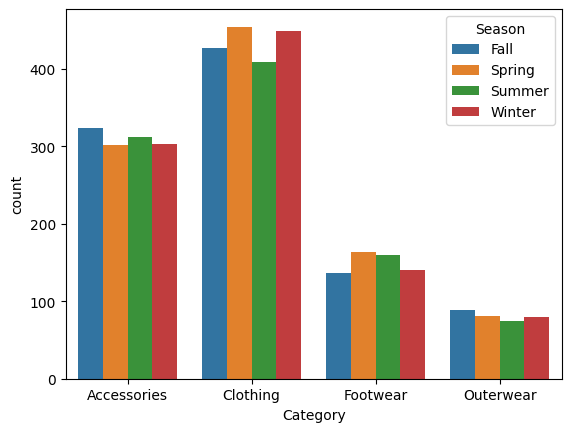

In [8]:
data_long = seasonal_trends.reset_index().melt(id_vars='Season', var_name='Category', value_name='count')

sns.barplot(data=data_long, x='Category', y='count', hue='Season')

별점 분포 ( 0~5 단계라 낮음 구간을 조금 넓게 잡았습니다.)

In [5]:
df1['Review Rating Category'] = pd.cut(df1['Review Rating'], bins=[0, 3.1, 4.1, 5], labels=['low', 'middle', 'high'])
review_rating_relationship = df1.groupby('Review Rating Category')['Purchase Amount (USD)'].count()

/tmp/ipykernel_703/1228966779.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  review_rating_relationship = df1.groupby('Review Rating Category')['Purchase Amount (USD)'].count()


In [6]:
df['Review Rating Category'] = pd.cut(df1['Review Rating'], bins=[0, 3.1, 4.1, 5], labels=['low', 'middle', 'high'])

In [7]:
df_rrc = pd.DataFrame(review_rating_relationship).reset_index()
df_rrc.columns = ['Review Rating Category', 'count']

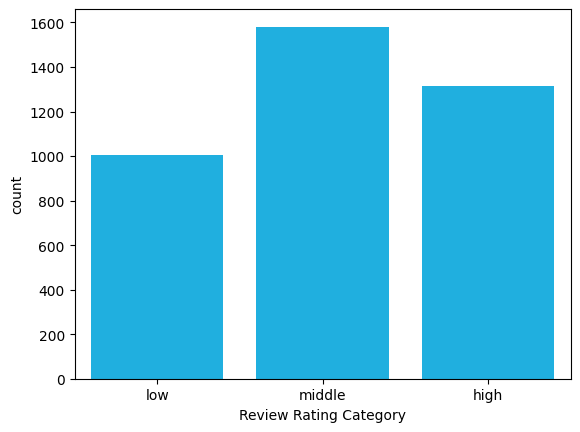

In [209]:
sns.barplot( x= 'Review Rating Category', y='count', data= df_rrc, color='deepskyblue')
plt.show()

구독 여부와 이전 구매 

In [12]:
subscription_status_relationship_mean = df1.groupby('Subscription Status')['Previous Purchases'].mean()
subscription_status_relationship_sum = df1.groupby('Subscription Status')['Previous Purchases'].sum()
subscription_status_relationship_median= df1.groupby('Subscription Status')['Previous Purchases'].median()

구독 여부 시각화


평균

<Axes: xlabel='Subscription Status', ylabel='Previous Purchases'>

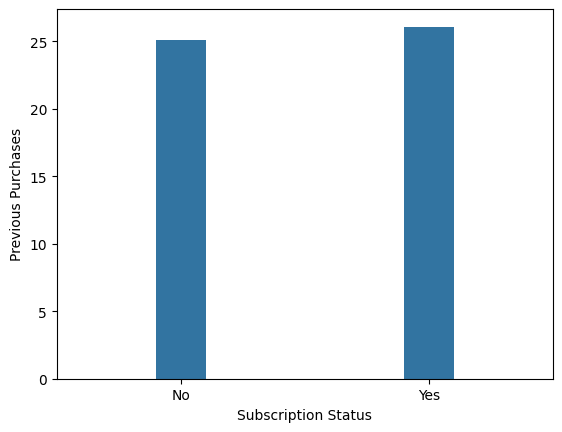

In [195]:
sns.barplot(subscription_status_relationship_mean, width=0.2)

중앙값

<Axes: xlabel='Subscription Status', ylabel='Previous Purchases'>

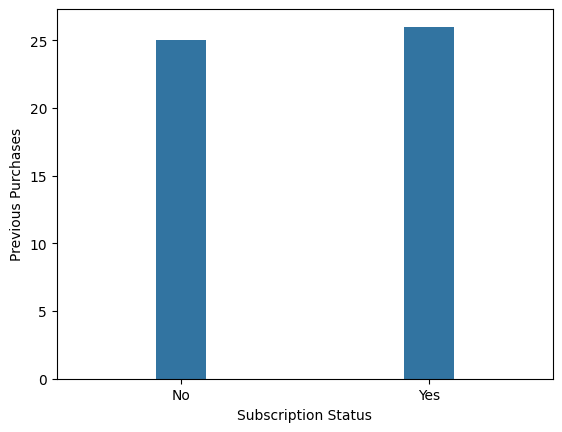

In [196]:
sns.barplot(subscription_status_relationship_median, width=0.2)

총합

<Axes: xlabel='Subscription Status', ylabel='Previous Purchases'>

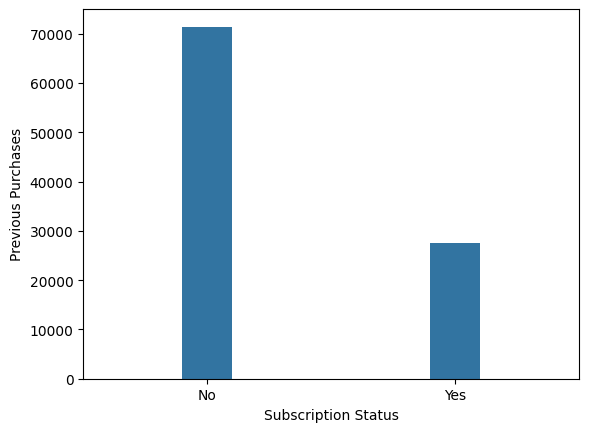

In [134]:
sns.barplot(subscription_status_relationship_sum, width=0.2)

In [13]:
df1.groupby('Frequency of Purchases')['Customer ID'].count()

Frequency of Purchases
Annually          572
Bi-Weekly         547
Every 3 Months    584
Fortnightly       542
Monthly           553
Quarterly         563
Weekly            539
Name: Customer ID, dtype: int64

In [35]:
df1.loc[df['Frequency of Purchases']=="Every 3 Months", 'Frequency of Purchases'] = 'Quarterly'

In [36]:
df1.loc[df['Frequency of Purchases']=="Bi-Weekly", 'Frequency of Purchases'] = 'Fortnightly'

In [41]:
df1.loc[df['Frequency of Purchases']=='Annually', 'Frequency of Purchases'] = 0
df1.loc[df['Frequency of Purchases']=='Quarterly', 'Frequency of Purchases'] = 1
df1.loc[df['Frequency of Purchases']=='Monthly', 'Frequency of Purchases'] = 2
df1.loc[df['Frequency of Purchases']=='Fortnightly', 'Frequency of Purchases'] = 3
df1.loc[df['Frequency of Purchases']=='Weekly', 'Frequency of Purchases'] = 4


In [42]:
df_a = df1.loc[:, ['Customer ID', 'Purchase Amount (USD)',  'Previous Purchases',  'Frequency of Purchases', 'Review Rating Category']]

In [45]:
df1['Frequency of Purchases'].unique()

array([3, 4, 0, 1, 2], dtype=object)

In [44]:
df1.loc[df1['Frequency of Purchases']=='Quarterly', 'Frequency of Purchases'] = 1
df1.loc[df1['Frequency of Purchases']=='Fortnightly', 'Frequency of Purchases'] = 3

In [49]:
pp_q75 = df1['Previous Purchases'].quantile(0.75)
pp_q50 = df1['Previous Purchases'].quantile(0.5)
pp_q25 = df1['Previous Purchases'].quantile(0.25)

def Previous_Purchases_score(x, df_a):
    if x >= pp_q75:
        return 3
    elif x >= pp_q50:
        return 2
    elif x >= pp_q25:
        return 1
    else:
        return 0
    return 0

df_a['Previous Purchases'] = df1['Previous Purchases'].apply(lambda x : Previous_Purchases_score(x, df1))

In [50]:
pa_q75 = df1['Purchase Amount (USD)'].quantile(0.75)
pa_q50 = df1['Purchase Amount (USD)'].quantile(0.5)
pa_q25 = df1['Purchase Amount (USD)'].quantile(0.25)

def Purchase_amount_qt(x, df_a):
    if x >= pa_q75:
        return 3
    elif x >= pa_q50:
        return 2
    elif x >= pa_q25:
        return 1
    else:
        return 0
    return 0

df_a['Purchase Amount (USD)'] = df1['Purchase Amount (USD)'].apply(lambda x : Purchase_amount_qt(x, df1))

In [51]:
df_a['Purchase Amount (USD)'].unique()

array([1, 2, 3, 0])

In [52]:
df_a.to_csv("numeric_to_categorical.csv")


In [56]:
df_a["Frequency of Purchases"] = df_a["Frequency of Purchases"].astype(int)
df_a["Review Rating Category"] = df_a["Review Rating Category"].astype(int)

In [55]:
df_a['qt_sum'] = df_a[["Purchase Amount (USD)","Previous Purchases","Frequency of Purchases","Review Rating Category"]].sum(axis=1)

In [56]:
df1["qt_sum"] = df_a['qt_sum']

,Customer ID,Purchase Amount (USD),Previous Purchases,Frequency of Purchases,Review Rating Category
0,1,53,14,3,0
1,2,64,2,3,0
2,3,73,23,4,0
3,4,90,49,4,1
4,5,49,31,0,0
...,...,...,...,...,...
3895,3896,28,32,4,2
3896,3897,49,41,3,2
3897,3898,33,24,1,0
3898,3899,77,24,4,1


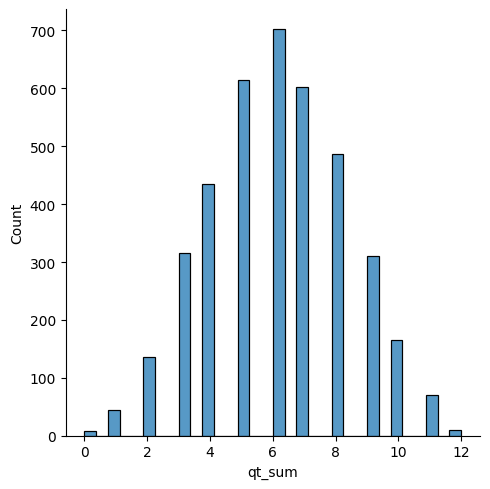

In [58]:
sns.displot(df_a["qt_sum"])

In [61]:
df_a

,Customer ID,Purchase Amount (USD),Previous Purchases,Frequency of Purchases,Review Rating Category
0,1,53,14,3,0
1,2,64,2,3,0
2,3,73,23,4,0
3,4,90,49,4,1
4,5,49,31,0,0
...,...,...,...,...,...
3895,3896,28,32,4,2
3896,3897,49,41,3,2
3897,3898,33,24,1,0
3898,3899,77,24,4,1


In [72]:
v_df = df1.loc[df1["qt_sum"] >= 8, ["Item Purchased_new", "location_new", "Season"]]

In [99]:
v_df

,Item Purchased_new,location_new,Season
3,shoes,Northeast,Spring
6,tops,West,Fall
12,outers,South,Winter
13,bottoms,Northeast,Spring
14,outers,Northeast,Winter
...,...,...,...
3886,accessories,Midwest,Summer
3893,wear_acc,Northeast,Fall
3895,tops,South,Summer
3896,bags,Midwest,Spring


<Figure size 160000x60000 with 0 Axes>

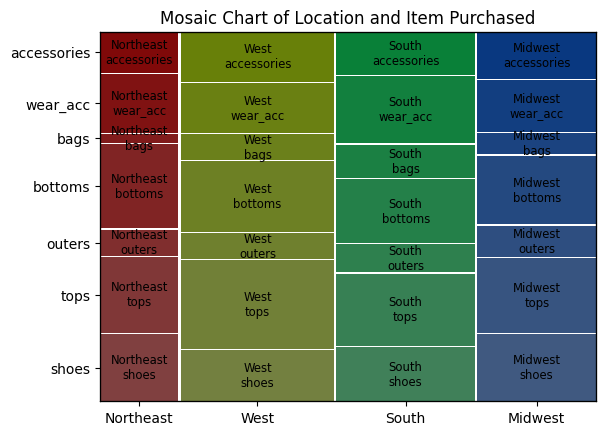

In [105]:
plt.figure(figsize=(1600, 600))
mosaic(v_df, ['location_new', 'Item Purchased_new'])
plt.title('Mosaic Chart of Location and Item Purchased')
plt.show()

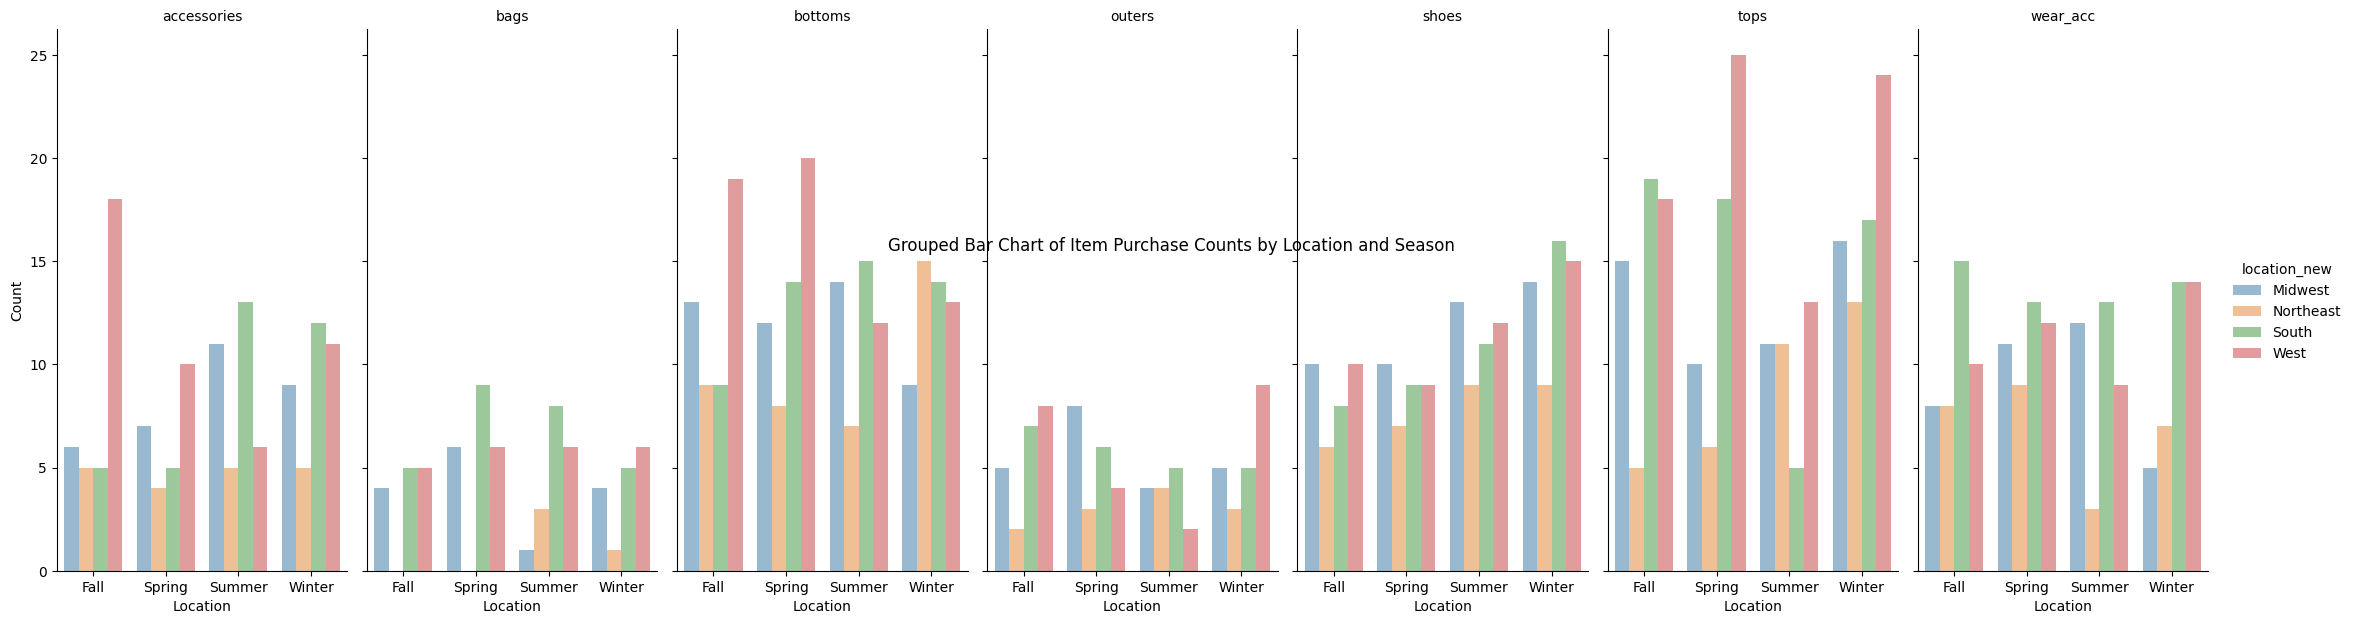

In [141]:
df_counts = v_df.groupby(['location_new', 'Season', 'Item Purchased_new']).size().reset_index(name='counts')

g = sns.catplot(
    data=df_counts, 
    x='Season', 
    y='counts', 
    hue='location_new', 
    col='Item Purchased_new', 
    kind='bar', 
    height=4, 
    aspect=.8,
    alpha = 0.5,
)
g.set_titles("{col_name}")
g.set_axis_labels("Location", "Count")
plt.subplots_adjust(top=1.5)
g.fig.suptitle('Grouped Bar Chart of Item Purchase Counts by Location and Season')

plt.show()

In [ ]:
g = sns.FacetGrid(v_df, col="location_new", row="Season")

g = g.map(plt.hist, "Item Purchased_new")

plt.show()

In [8]:
pp_q80 = df['Previous Purchases'].quantile(0.8)
pp_q60 = df['Previous Purchases'].quantile(0.6)
pp_q40 = df['Previous Purchases'].quantile(0.4)
pp_q20 = df['Previous Purchases'].quantile(0.2)

def Previous_Purchases_score(x, df):
    
    if x >= pp_q80:
        return 5
    elif x >= pp_q60:
        return 4
    elif x >= pp_q40:
        return 3
    elif x >= pp_q20:
        return 2
    else:
        return 1
df['Previous Purchases Score'] = df['Previous Purchases'].apply(lambda x: Previous_Purchases_score(x, df))

In [9]:
def Frequency_Purchases_Score(x):
    if x == 'Weekly':
        return 5
    elif x in ['Bi-Weekly', 'Fortnightly']:
        return 4
    elif x == 'Monthly':
        return 3
    elif x in ['Quarterly', 'Every 3 Months']:
        return 2
    elif x == 'Annually':
        return 1
df['Frequency Purchases Score'] = df['Frequency of Purchases'].apply(lambda x : Frequency_Purchases_Score(x))

In [10]:

df['Total_Amount'] = df['Purchase Amount (USD)'] * (df['Previous Purchases'] + 1)
tpas_q80 = df['Total_Amount'].quantile(0.8)
tpas_q60 = df['Total_Amount'].quantile(0.6)
tpas_q40 = df['Total_Amount'].quantile(0.4)
tpas_q20 = df['Total_Amount'].quantile(0.2)

def Total_Purchases_Amount_Score(x,df):
    if x >= tpas_q80:
        return 5
    elif x >= tpas_q60:
        return 4
    elif x >= tpas_q40:
        return 3
    elif x >= tpas_q20:
        return 2
    else:
        return 1
df['Total_Purchases_Amount_Score'] = df['Total_Amount'].apply(lambda x : Total_Purchases_Amount_Score(x,df))

In [11]:
df['Total Score'] = df['Previous Purchases Score'] + df['Frequency Purchases Score'] + df['Total_Purchases_Amount_Score']

In [12]:
def classify_customer(row):
    if (row['Previous Purchases'] <= 5) and (row['Frequency of Purchases'] in ['Weekly', 'Bi-Weekly','Fortnightly','Monthly']):
        return 'New Customer' # 신규 고객
    elif (row['Previous Purchases'] <= 5) and (row['Frequency of Purchases'] == 'Annually'):
        return 'InActive Customer' # 장기 미접속
    elif row['Total Score'] >= 13: # Loyal
        return 'Loyal Customer'
    elif row['Total Score'] <= 5: # Light
        return 'Light Customer'
    else:
        return 'Regural Customer'

df['Customer Type'] = df.apply(classify_customer, axis = 1)



In [13]:
df_rrc_2 = df.loc[:, ["Review Rating Category", "Customer Type"]]

In [168]:
df_rrc_3 = df.loc[:, ["Review Rating Category", "location_new"]]

In [169]:
df_rrc_3

,Review Rating Category,location_new
0,low,South
1,low,Northeast
2,low,Northeast
3,middle,Northeast
4,low,West
...,...,...
3895,high,South
3896,high,Midwest
3897,low,Northeast
3898,middle,Midwest


In [14]:
lolay_new_counts = df[(df_rrc_2["Customer Type"]=="Loyal Customer") | (df_rrc_2["Customer Type"]== "New Customer")]
lolay_new = lolay_new_counts.groupby(['Review Rating Category', 'Customer Type']).size().unstack(fill_value=0)

/tmp/ipykernel_703/2092654029.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lolay_new = lolay_new_counts.groupby(['Review Rating Category', 'Customer Type']).size().unstack(fill_value=0)


In [15]:
lolay_counts = df[(df_rrc_2["Customer Type"]=="Loyal Customer")]
lolay_count = lolay_new_counts.loc[(df_rrc_2["Customer Type"]=="Loyal Customer")].groupby(['Review Rating Category', 'Customer Type']).size().unstack(fill_value=0)

/tmp/ipykernel_703/3329987639.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lolay_count = lolay_new_counts.loc[(df_rrc_2["Customer Type"]=="Loyal Customer")].groupby(['Review Rating Category', 'Customer Type']).size().unstack(fill_value=0)


In [16]:
total_counts = df_rrc_2.groupby(['Review Rating Category']).size()

/tmp/ipykernel_703/3514764461.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = df_rrc_2.groupby(['Review Rating Category']).size()


In [17]:
rrc_ly_total_count = df_rrc_2.groupby(['Review Rating Category']).count()

/tmp/ipykernel_703/4110447751.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rrc_ly_total_count = df_rrc_2.groupby(['Review Rating Category']).count()


In [18]:
lolay_new1 = lolay_new_counts.groupby(['Review Rating Category', 'Customer Type']).size()
total_counts1 = df_rrc_2.groupby(['Review Rating Category']).size()

/tmp/ipykernel_703/3947157083.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lolay_new1 = lolay_new_counts.groupby(['Review Rating Category', 'Customer Type']).size()
/tmp/ipykernel_703/3947157083.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts1 = df_rrc_2.groupby(['Review Rating Category']).size()


In [19]:
lolay_count.columns = ['Customer Type']

In [20]:
type(rrc_ly_total_count)

pandas.core.frame.DataFrame

In [21]:
lolay_count

,Customer Type
Review Rating Category,
low,118
middle,201
high,186


In [23]:
loyal_rating_count = df[(df_rrc_2["Customer Type"]=="Loyal Customer")]
new_rating_count = df[(df_rrc_2["Customer Type"]== "New Customer")]
group_loyal_rating_count = loyal_rating_count[["Review Rating Category","Customer Type"]].groupby("Review Rating Category").count()
group_new_rating_count = new_rating_count[["Review Rating Category","Customer Type"]].groupby("Review Rating Category").count()

lolay_new1 = lolay_new_counts.groupby(['Review Rating Category', 'Customer Type']).size()
total_counts1 = df_rrc_2.groupby(['Review Rating Category']).size()
loyal_total_count_df = lolay_new1.unstack()
loyal_total_count = loyal_total_count_df["Loyal Customer"].sum()
new_totaa_count = loyal_total_count_df["New Customer"].sum()
ln_per_total = (lolay_new1/total_counts1).unstack()
loyal_total_count, new_totaa_count
rating_loyal_group_ratio = ((group_loyal_rating_count/loyal_total_count)*100).round(2)
rating_new_group_ratio = ((group_new_rating_count/new_totaa_count)*100).round(2)

/tmp/ipykernel_703/3898281068.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_loyal_rating_count = loyal_rating_count[["Review Rating Category","Customer Type"]].groupby("Review Rating Category").count()
/tmp/ipykernel_703/3898281068.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_new_rating_count = new_rating_count[["Review Rating Category","Customer Type"]].groupby("Review Rating Category").count()
/tmp/ipykernel_703/3898281068.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current 

In [24]:
rating_loyal_group_ratio.columns = ["Loyal_Customer"]

In [25]:
rating_new_group_ratio.columns = ["New_Customer"]

In [26]:
ratio_df = pd.concat([rating_loyal_group_ratio, rating_new_group_ratio], axis=1)

In [27]:
ratio_df = ratio_df.T

In [28]:
ratio_df.index

Index(['Loyal_Customer', 'New_Customer'], dtype='object')

In [29]:
ratio_df

Review Rating Category,low,middle,high
Loyal_Customer,23.37,39.80,36.83
New_Customer,25.41,45.08,29.51


In [30]:
df1.groupby("location_new").count()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Item Purchased_new,Age_group,Review Rating Category
location_new,,,,,,,,,,,,,,,,,,,,,
Midwest,937,937,937,937,937,937,937,937,937,937,...,937,937,937,937,937,937,937,937,937,937
Northeast,674,674,674,674,674,674,674,674,674,674,...,674,674,674,674,674,674,674,674,674,674
South,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119,...,1119,1119,1119,1119,1119,1119,1119,1119,1119,1119
West,1170,1170,1170,1170,1170,1170,1170,1170,1170,1170,...,1170,1170,1170,1170,1170,1170,1170,1170,1170,1170


In [172]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Item Purchased_new',
       'Age_group', 'location_new', 'Review Rating Category',
       'Previous Purchases Score', 'Frequency Purchases Score', 'Total_Amount',
       'Total_Purchases_Amount_Score', 'Total Score', 'Customer Type'],
      dtype='object')

In [69]:
df["Item Purchased"].unique()

array(['Blouse', 'Sweater', 'Jeans', 'Sandals', 'Sneakers', 'Shirt',
       'Shorts', 'Coat', 'Handbag', 'Shoes', 'Dress', 'Skirt',
       'Sunglasses', 'Pants', 'Jacket', 'Hoodie', 'Jewelry', 'T-shirt',
       'Scarf', 'Hat', 'Socks', 'Backpack', 'Belt', 'Boots', 'Gloves'],
      dtype=object)

/tmp/ipykernel_1133/1814392349.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bar_bottom = [bar_bottom[j] + ratio_df[col][j] for j in range(len(bar_bottom))]


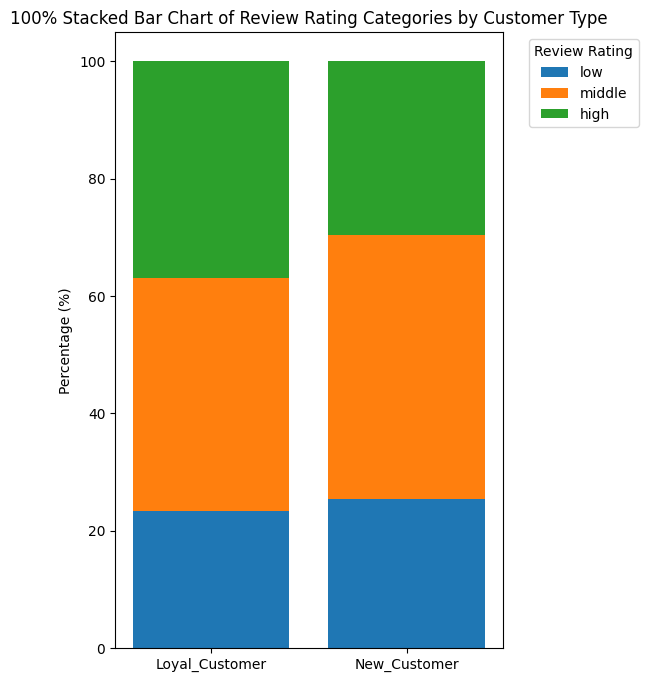

In [174]:
fig, ax = plt.subplots(figsize=(5, 8))

bar_bottom = [0, 0]

for i, col in enumerate(ratio_df.columns):
    ax.bar(ratio_df.index, ratio_df[col], bottom=bar_bottom, label=col)
    
    bar_bottom = [bar_bottom[j] + ratio_df[col][j] for j in range(len(bar_bottom))]

ax.set_ylabel('Percentage (%)')
ax.set_title('100% Stacked Bar Chart of Review Rating Categories by Customer Type')
ax.legend(title='Review Rating', bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

In [27]:
loyal_per_total = ((lolay_count/rrc_ly_total_count)*100).round(2)

In [129]:
rrc_ly_total_count.drop("loyal", axis=1, inplace=True)

In [17]:
ln_per_total = (lolay_new1/total_counts1).unstack()

In [144]:
lolay_count.unstack()

               Review Rating Category
Customer Type  low                       118
               middle                    201
               high                      186
dtype: int64

In [143]:
rrc_ly_total_count.unstack()

               Review Rating Category
Customer Type  low                       1004
               middle                    1581
               high                      1315
dtype: int64

In [145]:
df_merged = pd.concat([lolay_count.unstack(), rrc_ly_total_count.unstack()], axis=1)

df_merged.columns = ['Loyal Customer', 'New Customer']

In [147]:
lc_s = lolay_count.unstack()
rrc_ly_df = rrc_ly_total_count.unstack()

In [159]:
series1 = lc_s
series2 = rrc_ly_df


combined_df = pd.concat([series1, series2], axis=1)

combined_df.columns = ['Loyal Customer', 'Total Customer']

                        Loyal Customer  Total Customer
Review Rating Category                                
low                                118            1004
middle                             201            1581
high                               186            1315


In [ ]:
df_reset = combined_df.reset_index()

df_melted = pd.melt(df_reset, id_vars=['Review Rating Category'], var_name='Customer Type', value_name='Count')

In [202]:
a = rating_counts = df_rrc_3.groupby(['location_new', 'Review Rating Category']).size().reset_index(name='count')

/tmp/ipykernel_970/874922314.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  a = rating_counts = df_rrc_3.groupby(['location_new', 'Review Rating Category']).size().reset_index(name='count')


In [191]:
df_rrc_3['count'] = df.groupby('location_new')['Review Rating Category'].transform('size')

In [200]:
aa = df_rrc_3.groupby('count').size()

In [203]:
a

,location_new,Review Rating Category,count
0,Midwest,low,160
1,Midwest,middle,287
2,Midwest,high,210
3,Northeast,low,120
4,Northeast,middle,182
5,Northeast,high,159
6,South,low,211
7,South,middle,327
8,South,high,243
9,West,low,214


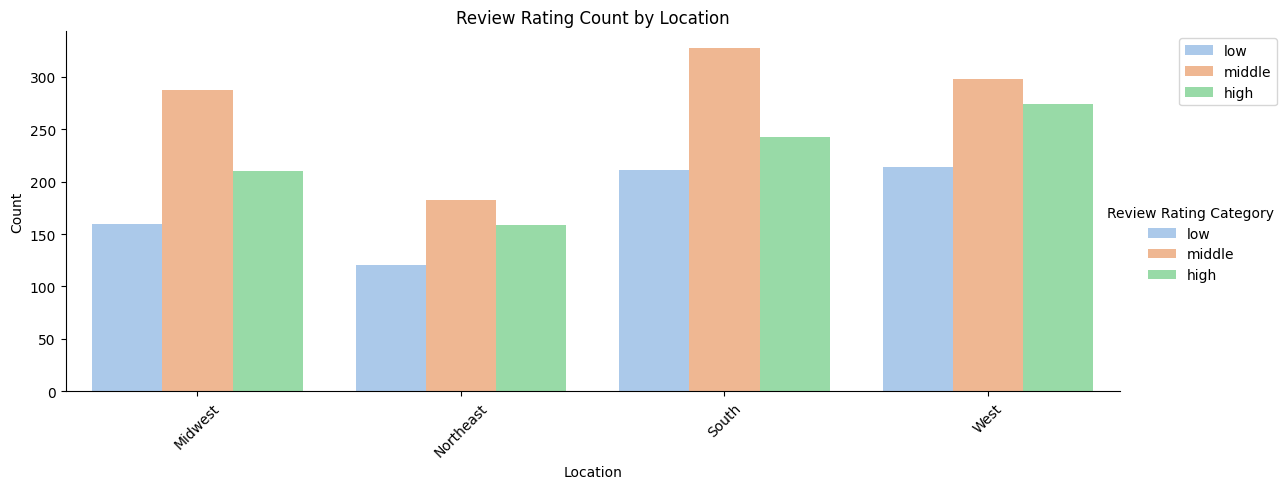

In [206]:
sns.catplot(
    data=a, 
    x='location_new', 
    y='count', 
    hue='Review Rating Category', 
    kind='bar', 
    height=5, 
    aspect=2,
    palette='pastel'
)
plt.legend( bbox_to_anchor=(1.05, 1))
plt.title('Review Rating Count by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

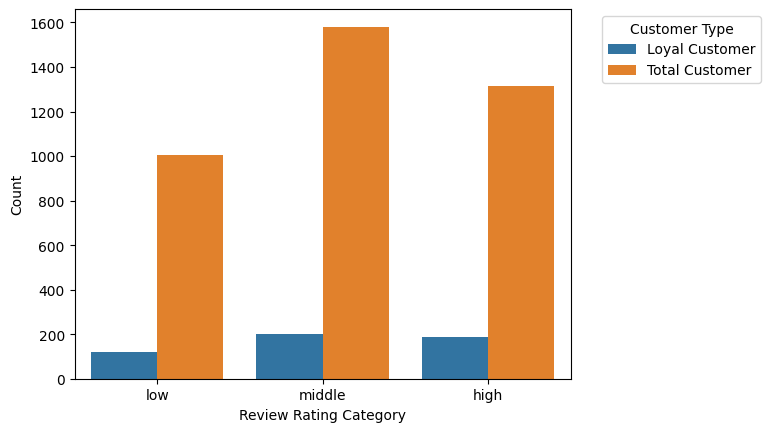

In [169]:
sns.barplot(x='Review Rating Category', y='Count', hue='Customer Type', data=df_melted)
plt.legend(title='Customer Type', bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

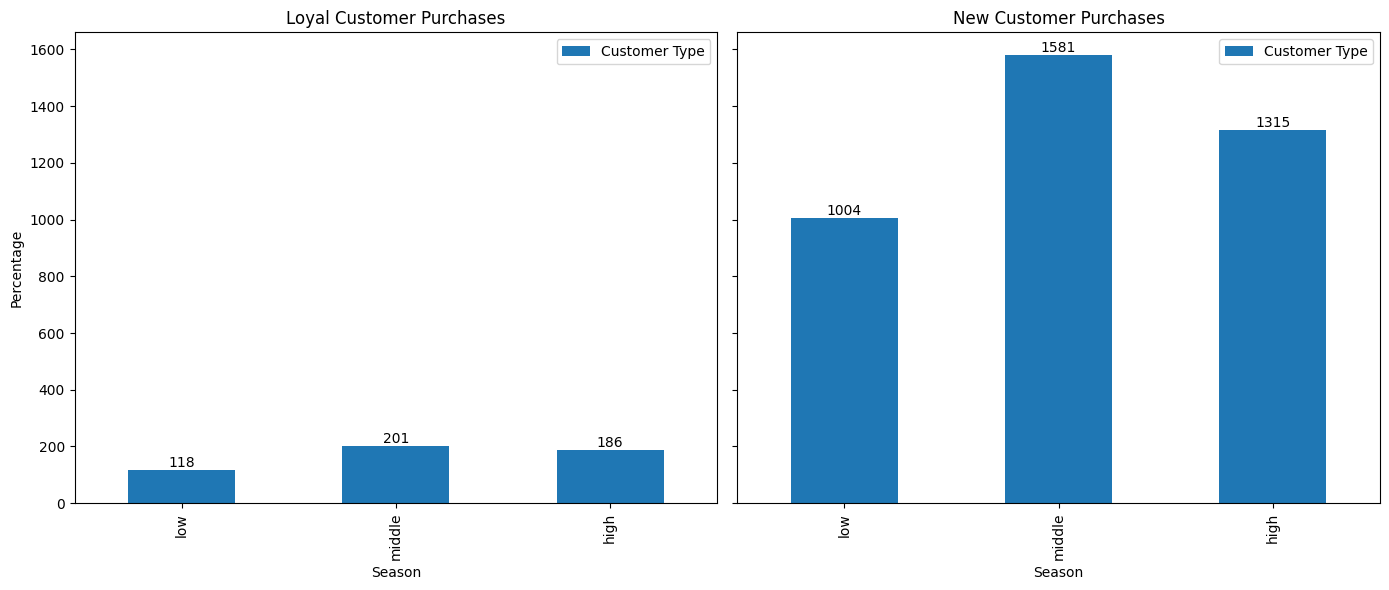

In [108]:



fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

lolay_count.plot(kind='bar', ax=axes[0], stacked=False)
axes[0].set_title('Loyal Customer Purchases')
axes[0].set_xlabel('Season')
axes[0].set_ylabel('Percentage')


rrc_ly_total_count.plot(kind='bar', ax=axes[1], stacked=False)
axes[1].set_title('New Customer Purchases')
axes[1].set_xlabel('Season')
axes[1].set_ylabel('Percentage')


for container in axes[0].containers:
    axes[0].bar_label(container, label_type='edge', rotation=0)


for container in axes[1].containers:
    axes[1].bar_label(container, label_type='edge', rotation=0)

plt.tight_layout()
plt.show()

In [42]:
loyal_df = df1.loc[df['Customer Type'] =='Loyal Customer', ["Item Purchased_new", "location_new", "Season"]]
new_df = df1.loc[df['Customer Type'] =='New Customer', ["Item Purchased_new", "location_new", "Season"]]
inactive_df = df1.loc[df['Customer Type'] =='InActive Customer', ["Item Purchased_new", "location_new", "Season"]]
light_df = df1.loc[df['Customer Type'] =='Light Customer', ["Item Purchased_new", "location_new", "Season"]]
regural_df = df1.loc[df['Customer Type'] =='Regural Customer', ["Item Purchased_new", "location_new", "Season"]]

In [43]:
loyal_item_detailed_df = df1.loc[df['Customer Type'] =='Loyal Customer', ["Item Purchased", "location_new", "Season", "Item Purchased_new"]]
new_item_detailed_df = df1.loc[df['Customer Type'] =='New Customer', ["Item Purchased", "location_new", "Season", "Item Purchased_new"]]

In [44]:
loyal_item_detailed_df

,Item Purchased,location_new,Season,Item Purchased_new
3,Sandals,Northeast,Spring,shoes
12,Coat,South,Winter,outers
13,Dress,Northeast,Spring,bottoms
14,Coat,Northeast,Winter,outers
19,Pants,Northeast,Summer,bottoms
...,...,...,...,...
3853,Sunglasses,South,Fall,accessories
3859,Shorts,South,Fall,bottoms
3861,Jacket,West,Spring,outers
3877,Hoodie,West,Spring,tops


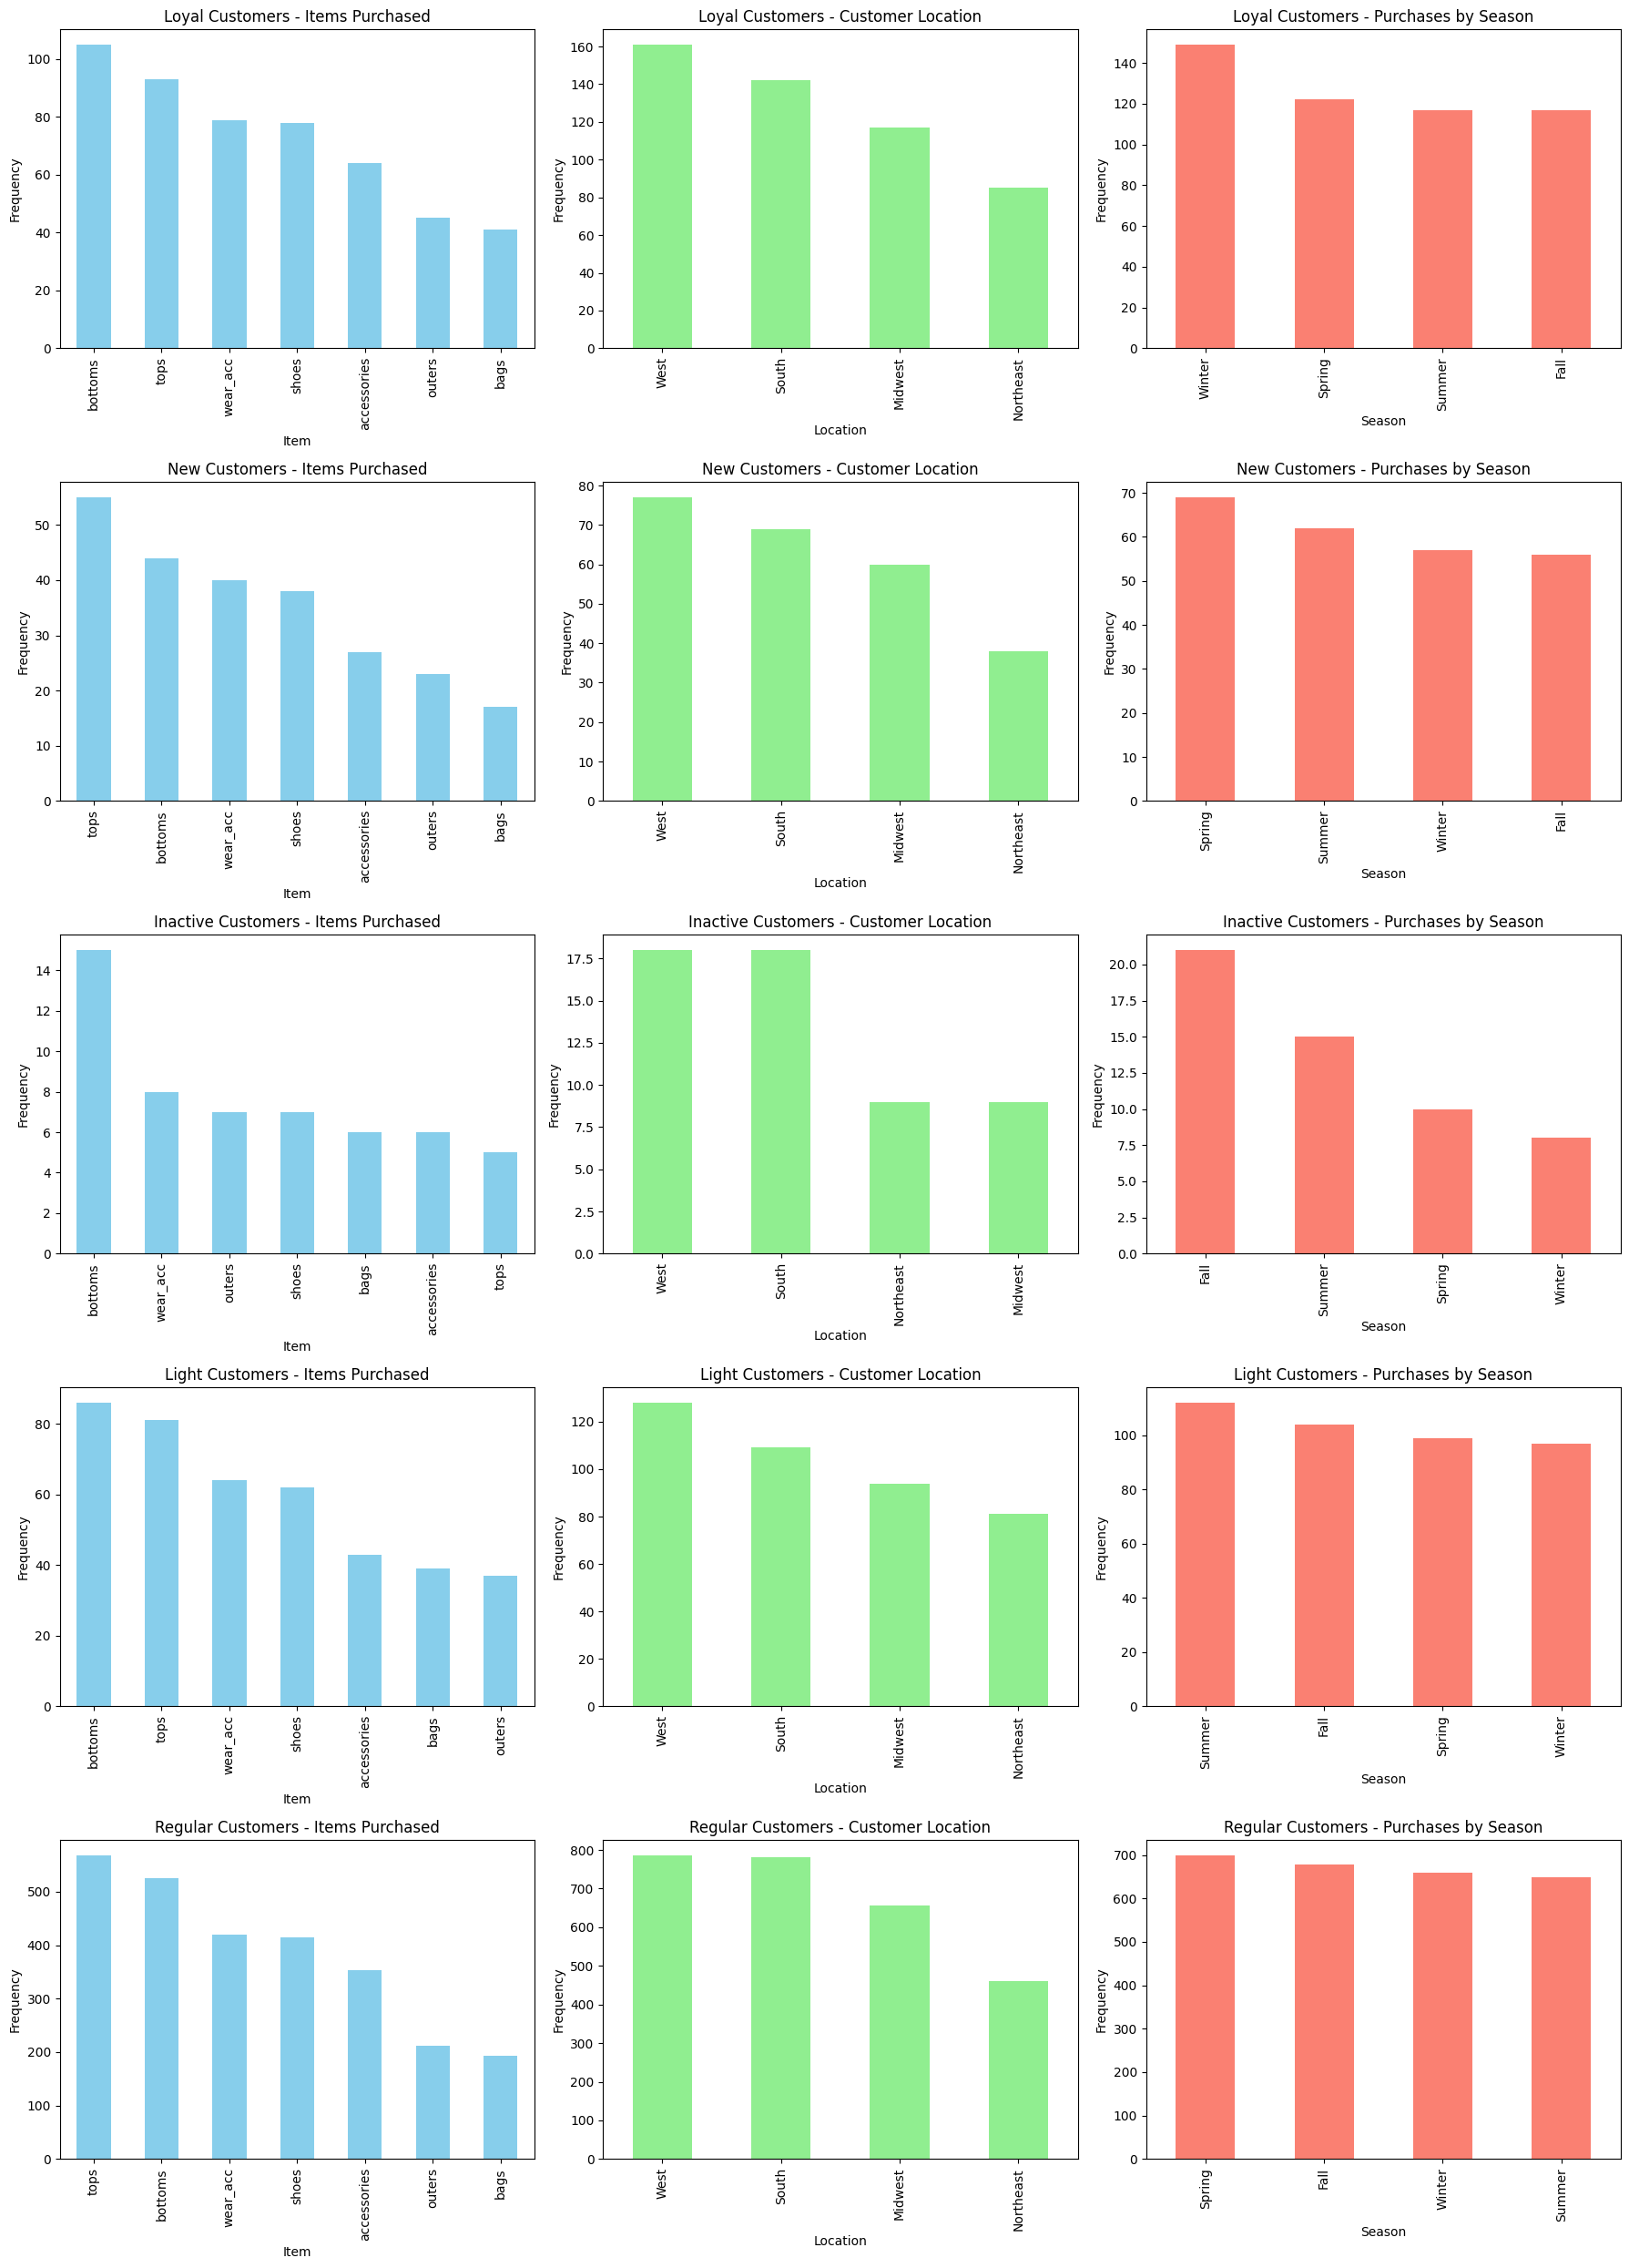

In [45]:
dfs = {
    'Loyal Customers': loyal_df,
    'New Customers': new_df,  
    'Inactive Customers': inactive_df,
    'Light Customers': light_df,
    'Regular Customers': regural_df
}


fig, axes = plt.subplots(len(dfs), 3, figsize=(18, 5 * len(dfs)))


for i, (df_name, df) in enumerate(dfs.items()):

    df['Item Purchased_new'].value_counts().plot(kind='bar', ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'{df_name} - Items Purchased')
    axes[i, 0].set_xlabel('Item')
    axes[i, 0].set_ylabel('Frequency')


    df['location_new'].value_counts().plot(kind='bar', ax=axes[i, 1], color='lightgreen')
    axes[i, 1].set_title(f'{df_name} - Customer Location')
    axes[i, 1].set_xlabel('Location')
    axes[i, 1].set_ylabel('Frequency')


    df['Season'].value_counts().plot(kind='bar', ax=axes[i, 2], color='salmon')
    axes[i, 2].set_title(f'{df_name} - Purchases by Season')
    axes[i, 2].set_xlabel('Season')
    axes[i, 2].set_ylabel('Frequency')


fig.tight_layout()


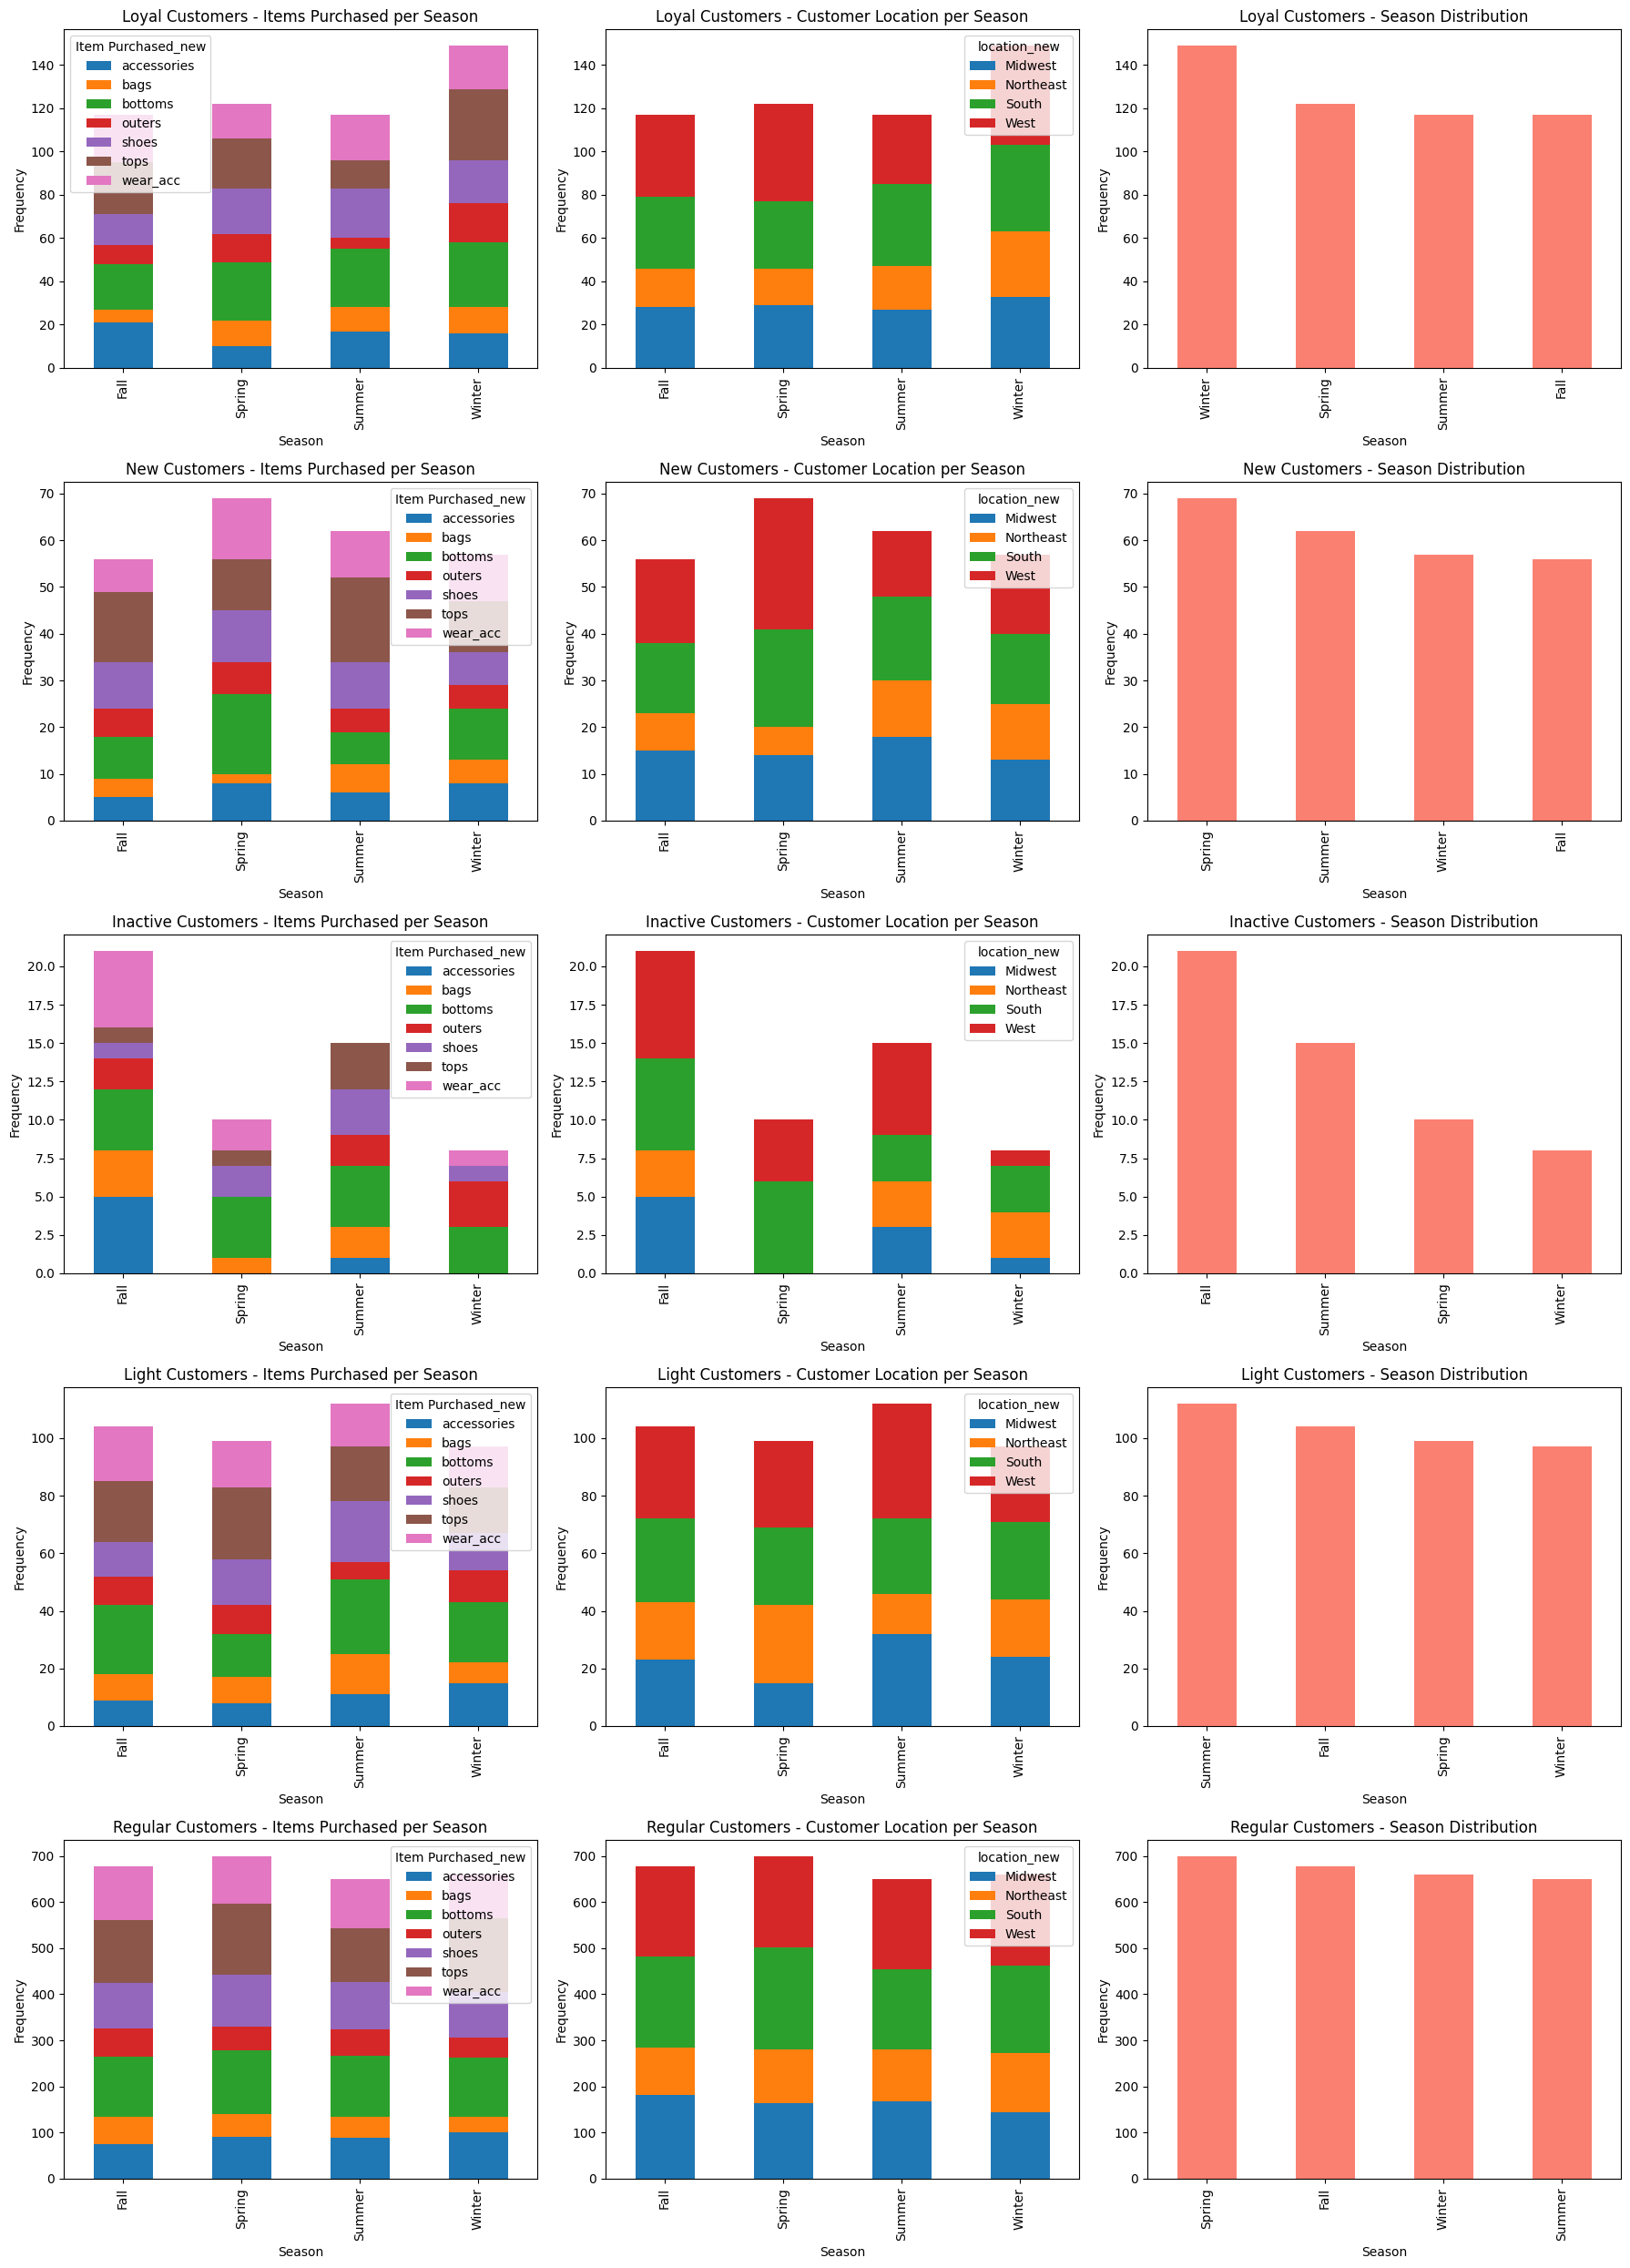

In [46]:
fig, axes = plt.subplots(len(dfs), 3, figsize=(18, 5 * len(dfs)))

for i, (df_name, df) in enumerate(dfs.items()):

    season_item_count = df.groupby('Season')['Item Purchased_new'].value_counts().unstack().fillna(0)
    
    season_item_count.plot(kind='bar', ax=axes[i, 0], stacked=True)
    axes[i, 0].set_title(f'{df_name} - Items Purchased per Season')
    axes[i, 0].set_xlabel('Season')
    axes[i, 0].set_ylabel('Frequency')
    
    season_location_count = df.groupby('Season')['location_new'].value_counts().unstack().fillna(0)
    
    season_location_count.plot(kind='bar', ax=axes[i, 1], stacked=True)
    axes[i, 1].set_title(f'{df_name} - Customer Location per Season')
    axes[i, 1].set_xlabel('Season')
    axes[i, 1].set_ylabel('Frequency')
    
    df['Season'].value_counts().plot(kind='bar', ax=axes[i, 2], color='salmon')
    axes[i, 2].set_title(f'{df_name} - Season Distribution')
    axes[i, 2].set_xlabel('Season')
    axes[i, 2].set_ylabel('Frequency')


fig.tight_layout()

In [47]:

loyal_counts = loyal_item_detailed_df.groupby(['Season', 'Item Purchased', "Item Purchased_new"]).size().unstack(fill_value=0)
new_counts = new_item_detailed_df.groupby(['Season', 'Item Purchased', "Item Purchased_new"]).size().unstack(fill_value=0)

In [48]:
loyal_counts

Item Purchased_new     accessories  bags  bottoms  outers  shoes  tops  \
Season Item Purchased                                                    
Fall   Backpack                  0     3        0       0      0     0   
       Belt                      5     0        0       0      0     0   
       Blouse                    0     0        0       0      0     6   
       Boots                     0     0        0       0      1     0   
       Coat                      0     0        0       5      0     0   
...                            ...   ...      ...     ...    ...   ...   
Winter Sneakers                  0     0        0       0      5     0   
       Socks                     0     0        0       0      0     0   
       Sunglasses                2     0        0       0      0     0   
       Sweater                   0     0        0       0      0     6   
       T-shirt                   0     0        0       0      0     3   

Item Purchased_new     wear_acc  
Season Item Purchased            
Fall   Backpack               0  
       Belt                   0  
       Blouse                 0  
       Boots                  0  
       Coat                   0  
...                         ...  
Winter Sneakers               0  
       Socks                  3  
       Sunglasses             0  
       Sweater                0  
       T-shirt                0  

[98 rows x 7 columns]

In [49]:
loyal_counts_o = loyal_item_detailed_df.groupby(['Season', 'Item Purchased']).size().unstack(fill_value=0)
new_counts_o = new_item_detailed_df.groupby(['Season', 'Item Purchased']).size().unstack(fill_value=0)

In [50]:
loyal_counts_o

Item Purchased,Backpack,Belt,Blouse,Boots,Coat,Dress,Gloves,Handbag,Hat,Hoodie,...,Scarf,Shirt,Shoes,Shorts,Skirt,Sneakers,Socks,Sunglasses,Sweater,T-shirt
Season,,,,,,,,,,,,,,,,,,,,,
Fall,3,5,6,1,5,4,8,3,4,3,...,4,6,3,8,3,6,6,10,7,2
Spring,5,5,2,7,7,8,5,7,5,6,...,1,6,8,6,9,5,5,2,4,5
Summer,5,1,4,7,5,6,2,6,6,3,...,8,0,4,5,4,7,5,5,4,2
Winter,4,5,8,9,10,8,7,8,3,8,...,7,8,4,6,8,5,3,2,6,3


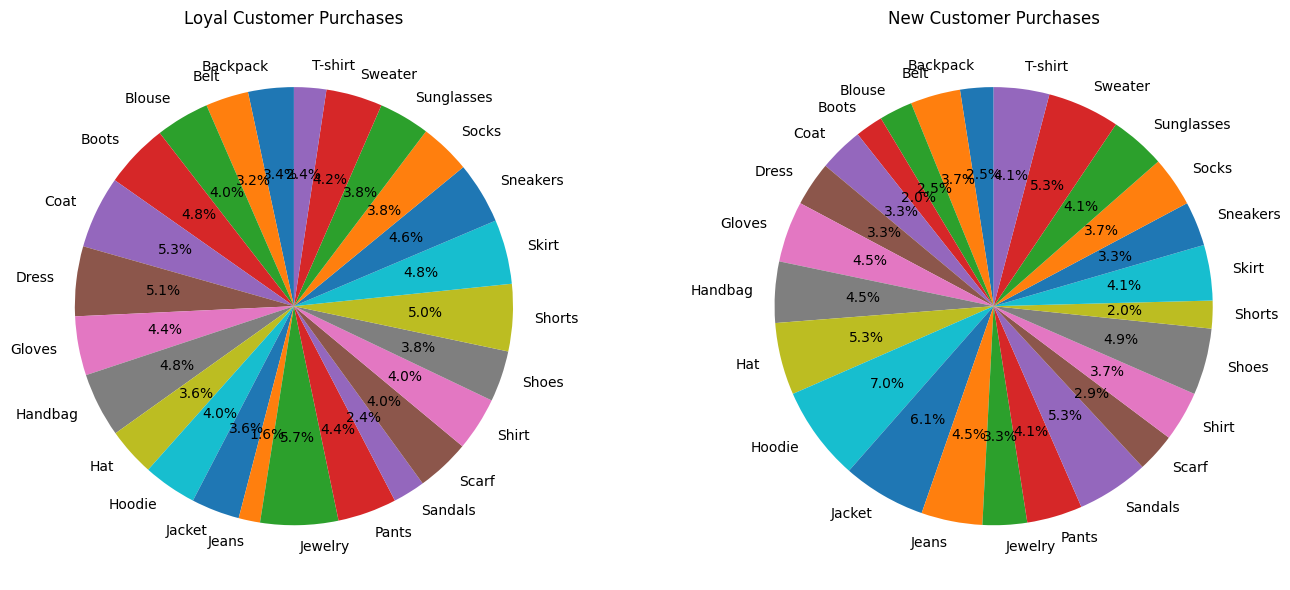

In [51]:
loyal_totals_o = loyal_counts_o.sum().sum()
new_totals_o = new_counts_o.sum().sum()

# Create pie charts
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart for loyal customers
axes[0].pie(loyal_counts_o.sum(), labels=loyal_counts_o.columns, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Loyal Customer Purchases')

# Pie chart for new customers
axes[1].pie(new_counts_o.sum(), labels=new_counts_o.columns, autopct='%1.1f%%', startangle=90)
axes[1].set_title('New Customer Purchases')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

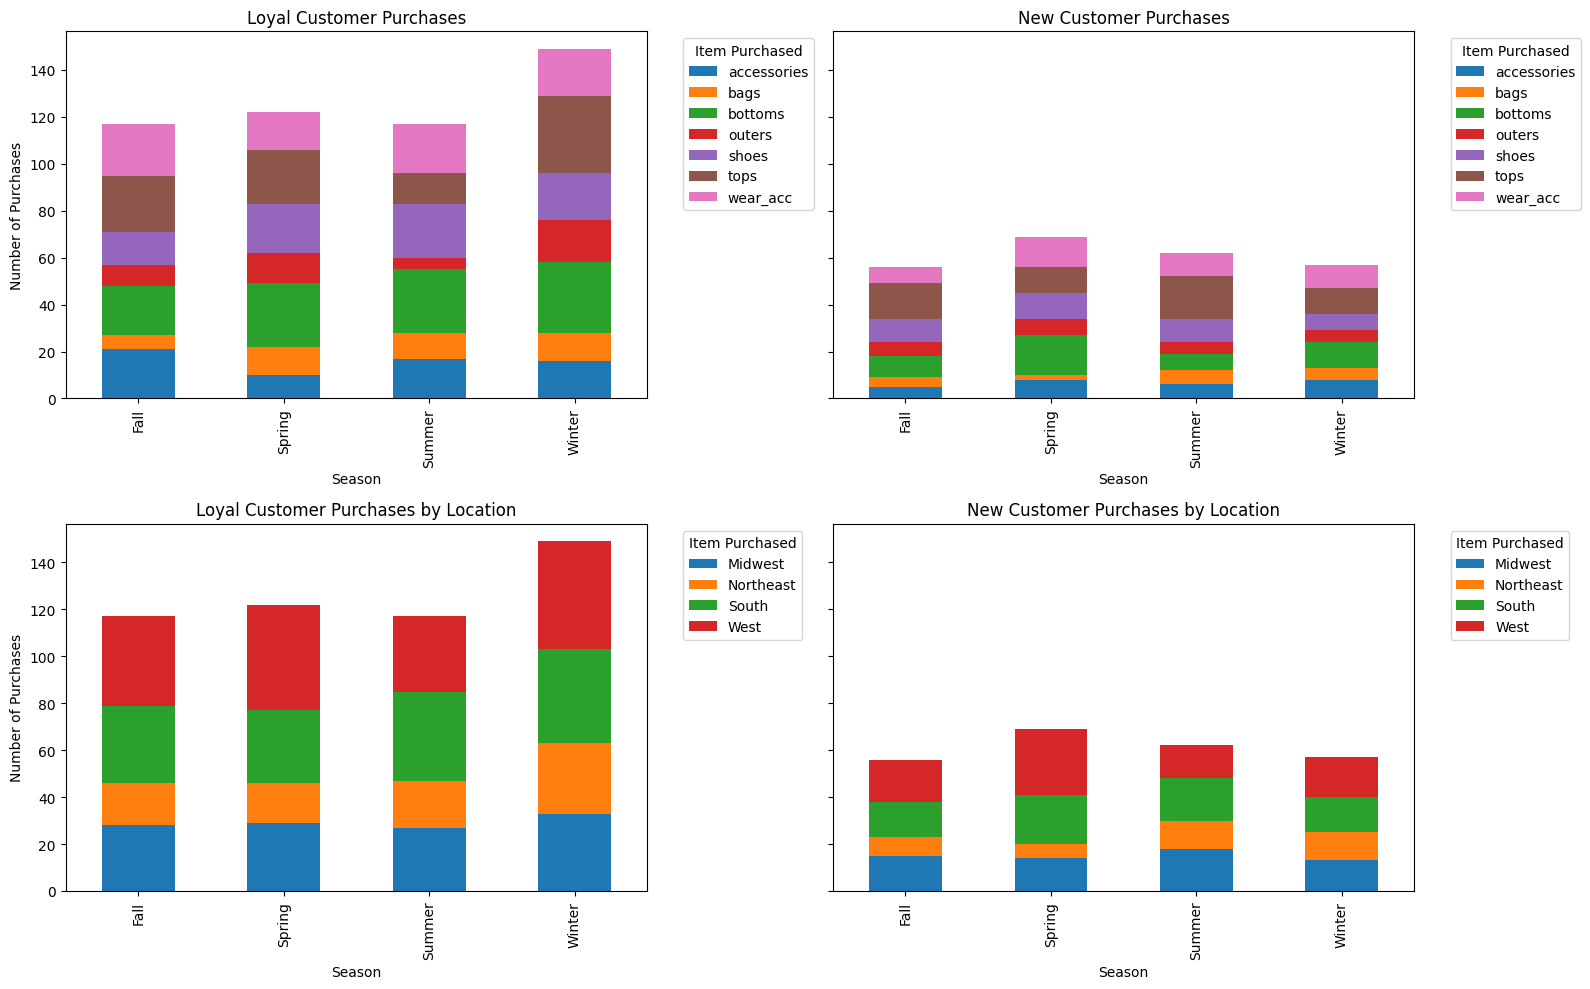

In [52]:

loyal_counts = loyal_item_detailed_df.groupby(['Season', 'Item Purchased_new']).size().unstack(fill_value=0)
new_counts = new_item_detailed_df.groupby(['Season', 'Item Purchased_new']).size().unstack(fill_value=0)

loyal_counts_l = loyal_item_detailed_df.groupby(['Season', 'location_new']).size().unstack(fill_value=0)
new_counts_l = new_item_detailed_df.groupby(['Season', 'location_new']).size().unstack(fill_value=0)


fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharey='row')

loyal_counts.plot(kind='bar', ax=axes[0, 0], stacked=True)
axes[0, 0].set_title('Loyal Customer Purchases')
axes[0, 0].set_xlabel('Season')
axes[0, 0].set_ylabel('Number of Purchases')
axes[0, 0].legend(title='Item Purchased', bbox_to_anchor=(1.05, 1), loc='upper left')

new_counts.plot(kind='bar', ax=axes[0, 1], stacked=True)
axes[0, 1].set_title('New Customer Purchases')
axes[0, 1].set_xlabel('Season')
axes[0, 1].legend(title='Item Purchased', bbox_to_anchor=(1.05, 1), loc='upper left')

loyal_counts_l.plot(kind='bar', ax=axes[1, 0], stacked=True)
axes[1, 0].set_title('Loyal Customer Purchases by Location')
axes[1, 0].set_xlabel('Season')
axes[1, 0].set_ylabel('Number of Purchases')
axes[1, 0].legend(title='Item Purchased', bbox_to_anchor=(1.05, 1), loc='upper left')

new_counts_l.plot(kind='bar', ax=axes[1, 1], stacked=True)
axes[1, 1].set_title('New Customer Purchases by Location')
axes[1, 1].set_xlabel('Season')
axes[1, 1].legend(title='Item Purchased', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

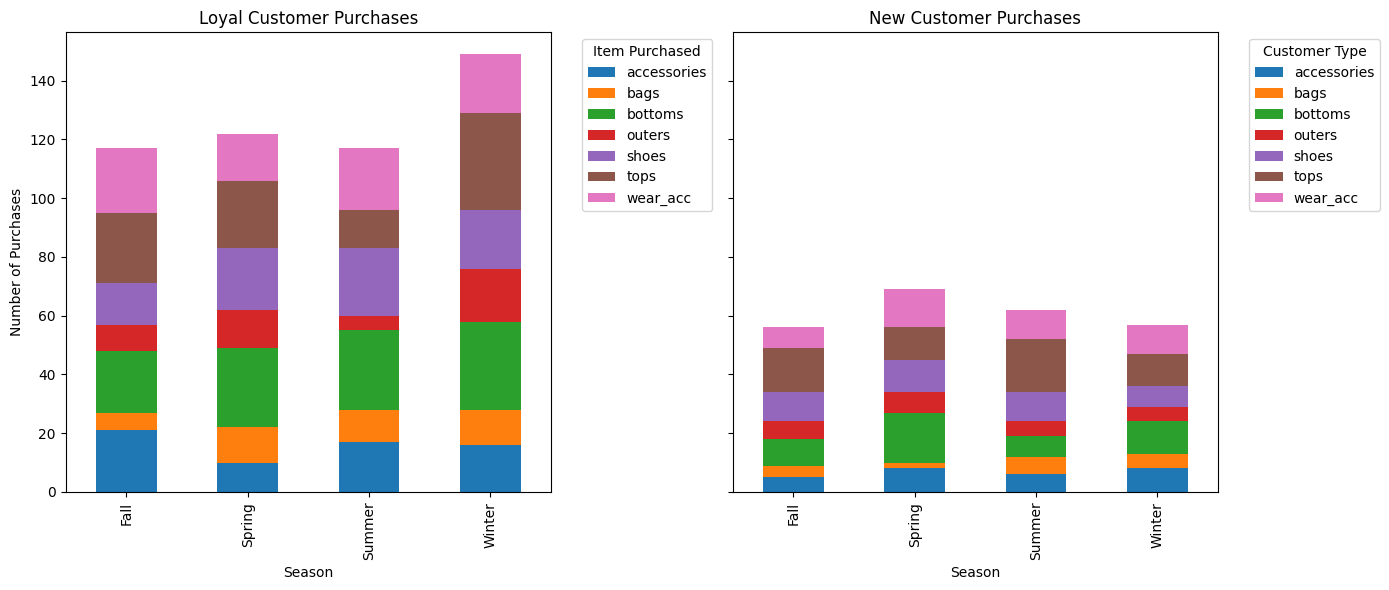

In [53]:

loyal_counts = loyal_item_detailed_df.groupby(['Season', 'Item Purchased_new']).size().unstack(fill_value=0)
new_counts = new_item_detailed_df.groupby(['Season', 'Item Purchased_new']).size().unstack(fill_value=0)

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

loyal_counts.plot(kind='bar', ax=axes[0], stacked=True)
axes[0].set_title('Loyal Customer Purchases')
axes[0].set_xlabel('Season')
axes[0].set_ylabel('Number of Purchases')

axes[0].legend(title='Item Purchased', bbox_to_anchor=(1.05, 1), loc='upper left')

new_counts.plot(kind='bar', ax=axes[1], stacked=True)
axes[1].set_title('New Customer Purchases')
axes[1].set_xlabel('Season')
axes[1].set_ylabel('Number of Purchases')
axes[1].legend(title='Item Purchased', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(title='Customer Type', bbox_to_anchor=(1.05, 1), loc=2)

plt.tight_layout()

plt.show()

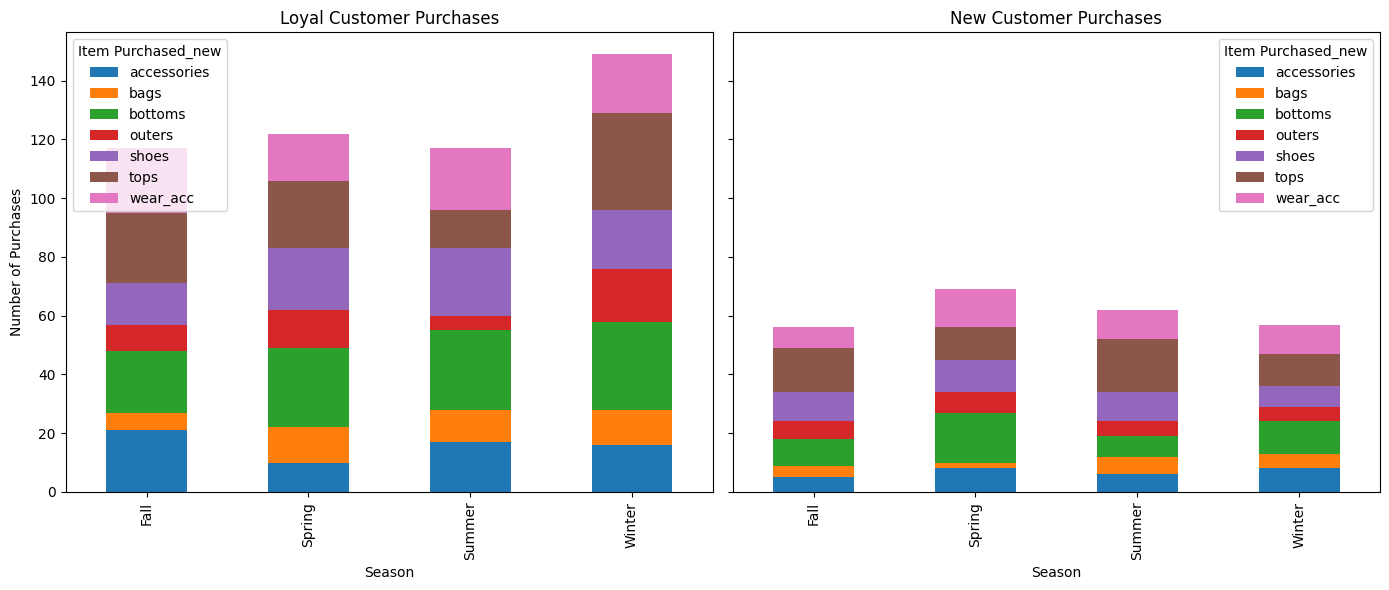

In [54]:

loyal_counts = loyal_df.groupby(['Season', 'Item Purchased_new']).size().unstack(fill_value=0)
new_counts = new_df.groupby(['Season', 'Item Purchased_new']).size().unstack(fill_value=0)

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

loyal_counts.plot(kind='bar', ax=axes[0], stacked=True)
axes[0].set_title('Loyal Customer Purchases')
axes[0].set_xlabel('Season')
axes[0].set_ylabel('Number of Purchases')

new_counts.plot(kind='bar', ax=axes[1], stacked=True)
axes[1].set_title('New Customer Purchases')
axes[1].set_xlabel('Season')
axes[1].set_ylabel('Number of Purchases')

plt.tight_layout()
plt.show()

In [85]:
df

,Item Purchased_new,location_new,Season
0,tops,South,Winter
2,bottoms,Northeast,Spring
4,tops,West,Spring
5,shoes,West,Summer
6,tops,West,Fall
...,...,...,...
3894,bottoms,Northeast,Spring
3895,tops,South,Summer
3897,accessories,Northeast,Spring
3898,shoes,Midwest,Summer


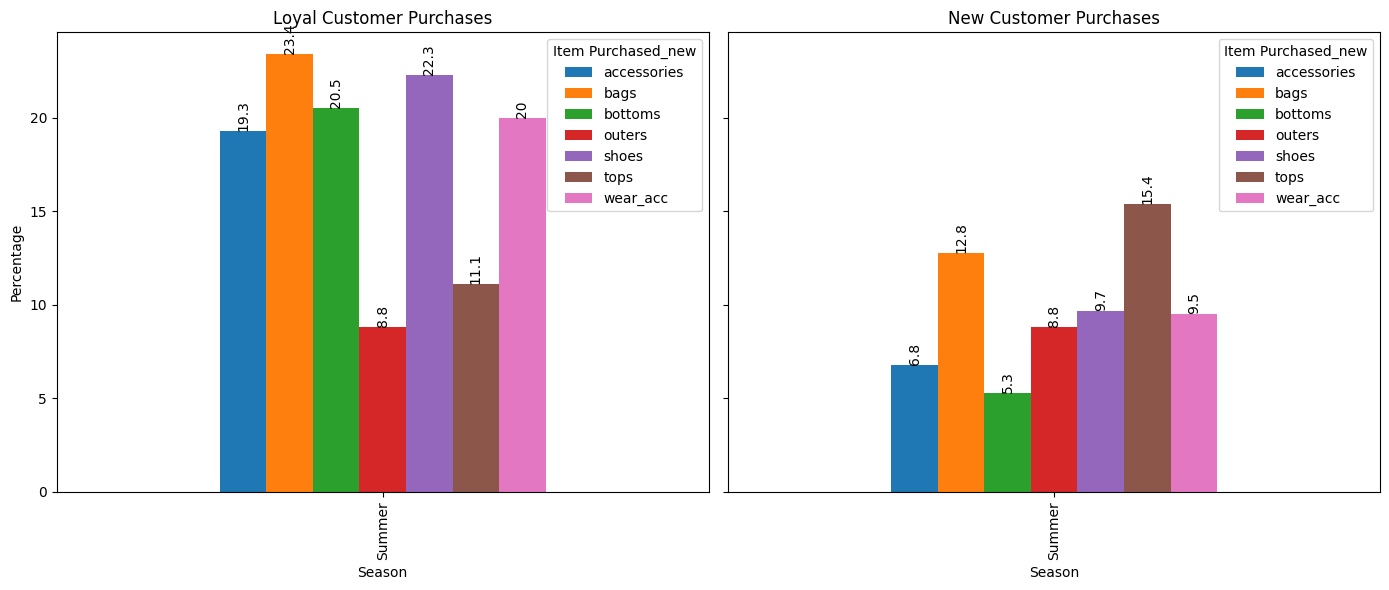

In [55]:
loyal_counts1 = loyal_df.loc[loyal_df["Season"]=="Summer"].groupby(['Season', 'Item Purchased_new']).size()
new_counts1 = new_df.loc[new_df["Season"]=="Summer"].groupby(['Season', 'Item Purchased_new']).size()
total_counts2 = df.loc[df["Season"]=="Summer"].groupby(['Season', 'Item Purchased_new']).size()
l_p_t = (loyal_counts1/total_counts2)*100
n_p_t = (new_counts1/total_counts2)*100
l_p_t.unstack(fill_value=0)

loyal_counts3 = l_p_t.groupby(['Season', 'Item Purchased_new']).mean().unstack(fill_value=0).round(1)
new_counts3 = n_p_t.groupby(['Season', 'Item Purchased_new']).mean().unstack(fill_value=0).round(1)


fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

loyal_counts3.plot(kind='bar', ax=axes[0], stacked=False)
axes[0].set_title('Loyal Customer Purchases')
axes[0].set_xlabel('Season')
axes[0].set_ylabel('Percentage')

new_counts3.plot(kind='bar', ax=axes[1], stacked=False)
axes[1].set_title('New Customer Purchases')
axes[1].set_xlabel('Season')
axes[1].set_ylabel('Percentage')

for container in axes[0].containers:
    axes[0].bar_label(container, label_type='edge', rotation=90)
    
for container in axes[1].containers:
    axes[1].bar_label(container, label_type='edge', rotation=90)

plt.tight_layout()
plt.show()

In [56]:
loyal_counts1 = loyal_df.groupby(['location_new', 'Item Purchased_new']).size()
new_counts1 = new_df.groupby(['location_new', 'Item Purchased_new']).size()
total_counts2 = df.groupby(['location_new', 'Item Purchased_new']).size()

In [57]:
total_counts2

location_new  Item Purchased_new
Midwest       accessories            96
              bags                   43
              bottoms               132
              outers                 55
              shoes                 103
              tops                  133
              wear_acc               95
Northeast     accessories            56
              bags                   33
              bottoms                93
              outers                 39
              shoes                  74
              tops                   93
              wear_acc               73
South         accessories            98
              bags                   52
              bottoms               152
              outers                 55
              shoes                 123
              tops                  177
              wear_acc              124
West          accessories           103
              bags                   65
              bottoms               149
       

In [74]:
new_df

,Item Purchased_new,location_new,Season
1,tops,Northeast,Winter
59,accessories,South,Spring
69,accessories,South,Summer
74,wear_acc,Midwest,Spring
85,accessories,West,Winter
...,...,...,...
3840,bottoms,West,Spring
3864,tops,West,Winter
3872,outers,Northeast,Spring
3884,shoes,South,Fall


In [83]:
loyal_counts1.count()

25

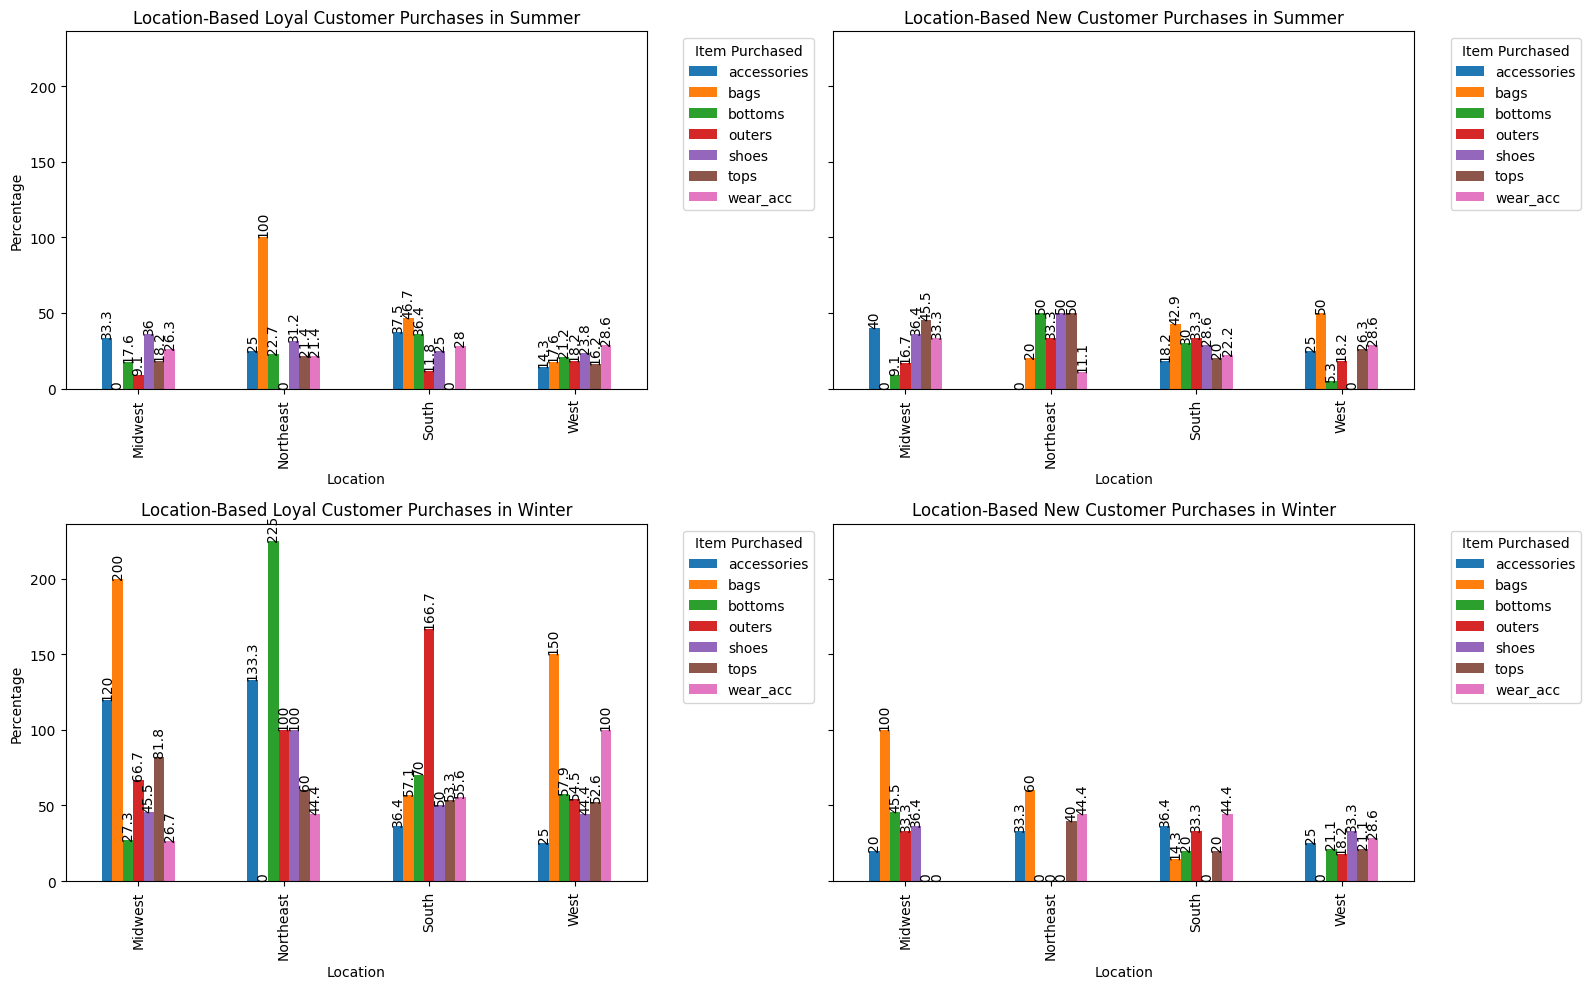

In [84]:
loyal_counts1 = loyal_df.loc[loyal_df["Season"]=="Summer"].groupby(['location_new', 'Item Purchased_new']).size()
new_counts1 = new_df.loc[new_df["Season"]=="Summer"].groupby(['location_new', 'Item Purchased_new']).size()
total_counts2 = loyal_df.groupby(['location_new', 'Item Purchased_new']).size()

loyal_counts_win = loyal_df.loc[loyal_df["Season"]=="Winter"].groupby(['location_new', 'Item Purchased_new']).size()
new_counts1_win = new_df.loc[new_df["Season"]=="Winter"].groupby(['location_new', 'Item Purchased_new']).size()
total_counts2_win = new_df.groupby(['location_new', 'Item Purchased_new']).size()

l_p_t = (loyal_counts1/total_counts2)*100
n_p_t = (new_counts1/total_counts2)*100
l_p_t.unstack(fill_value=0)
n_p_t.unstack(fill_value=0)

loyal_counts3 = l_p_t.groupby(['location_new', 'Item Purchased_new']).mean().unstack(fill_value=0).round(1)
new_counts3 = n_p_t.groupby(['location_new', 'Item Purchased_new']).mean().unstack(fill_value=0).round(1)

l_p_t_win = (loyal_counts_win/total_counts2_win)*100
n_p_t_win = (new_counts1_win/total_counts2_win)*100
l_p_t_win.unstack(fill_value=0)
n_p_t_win.unstack(fill_value=0)

loyal_counts3_win = l_p_t_win.groupby(['location_new', 'Item Purchased_new']).mean().unstack(fill_value=0).round(1)
new_counts3_win = n_p_t_win.groupby(['location_new', 'Item Purchased_new']).mean().unstack(fill_value=0).round(1)


fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharey=True)

loyal_counts3.plot(kind='bar', ax=axes[0,0], stacked=False)
axes[0,0].set_title('Location-Based Loyal Customer Purchases in Summer')
axes[0,0].set_xlabel('Location')
axes[0,0].set_ylabel('Percentage')
axes[0,0].legend(title='Item Purchased', bbox_to_anchor=(1.05, 1), loc='upper left')

new_counts3.plot(kind='bar', ax=axes[0,1], stacked=False)
axes[0,1].set_title('Location-Based New Customer Purchases in Summer')
axes[0, 1].set_xlabel('Location')
axes[0, 1].set_ylabel('Percentage')
axes[0,1].legend(title='Item Purchased', bbox_to_anchor=(1.05, 1), loc='upper left')

loyal_counts3_win.plot(kind='bar', ax=axes[1, 0], stacked=False)
axes[1,0].set_title('Location-Based Loyal Customer Purchases in Winter')
axes[1,0].set_xlabel('Location')
axes[1,0].set_ylabel('Percentage')
axes[1,0].legend(title='Item Purchased', bbox_to_anchor=(1.05, 1), loc='upper left')

new_counts3_win.plot(kind='bar', ax=axes[1,1], stacked=False)
axes[1,1].set_title('Location-Based New Customer Purchases in Winter')
axes[1, 1].set_xlabel('Location')
axes[1, 1].set_ylabel('Percentage')
axes[1,1].legend(title='Item Purchased', bbox_to_anchor=(1.05, 1), loc='upper left')


for container in axes[0,0].containers:
    axes[0,0].bar_label(container, label_type='edge', rotation=90)

for container in axes[0,1].containers:
    axes[0,1].bar_label(container, label_type='edge', rotation=90)
    
for container in axes[1,0].containers:
    axes[1,0].bar_label(container, label_type='edge', rotation=90)

for container in axes[1,1].containers:
    axes[1,1].bar_label(container, label_type='edge', rotation=90)

plt.tight_layout()
plt.show()

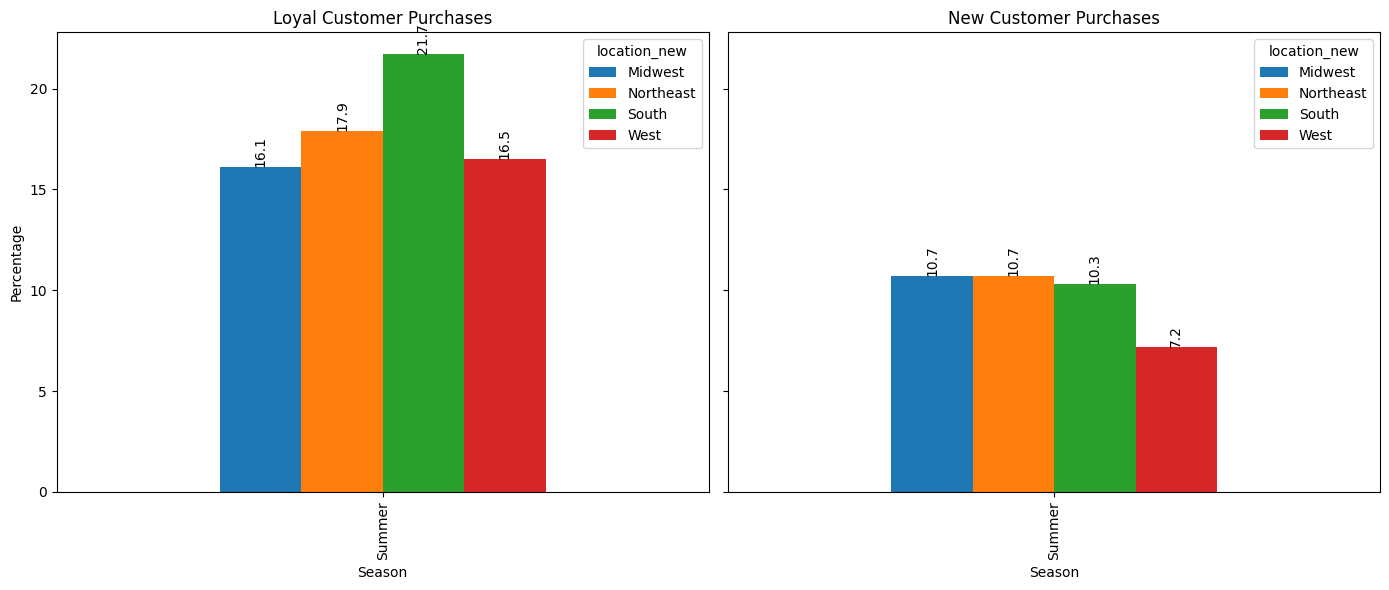

In [59]:
loyal_counts1 = loyal_df.loc[loyal_df["Season"]=="Summer"].groupby(['Season', 'location_new']).size()
new_counts1 = new_df.loc[new_df["Season"]=="Summer"].groupby(['Season', 'location_new']).size()
total_counts2 = df.loc[df["Season"]=="Summer"].groupby(['Season', 'location_new']).size()
l_p_t = (loyal_counts1/total_counts2)*100
n_p_t = (new_counts1/total_counts2)*100
l_p_t.unstack(fill_value=0)
n_p_t.unstack(fill_value=0)

loyal_counts3 = l_p_t.groupby(['Season', 'location_new']).mean().unstack(fill_value=0).round(1)
new_counts3 = n_p_t.groupby(['Season', 'location_new']).mean().unstack(fill_value=0).round(1)

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

loyal_counts3.plot(kind='bar', ax=axes[0], stacked=False)
axes[0].set_title('Loyal Customer Purchases')
axes[0].set_xlabel('Season')
axes[0].set_ylabel('Percentage')

new_counts3.plot(kind='bar', ax=axes[1], stacked=False)
axes[1].set_title('New Customer Purchases')
axes[1].set_xlabel('Season')
axes[1].set_ylabel('Percentage')


for container in axes[0].containers:
    axes[0].bar_label(container, label_type='edge', rotation=90)


for container in axes[1].containers:
    axes[1].bar_label(container, label_type='edge', rotation=90)

plt.tight_layout()
plt.show()

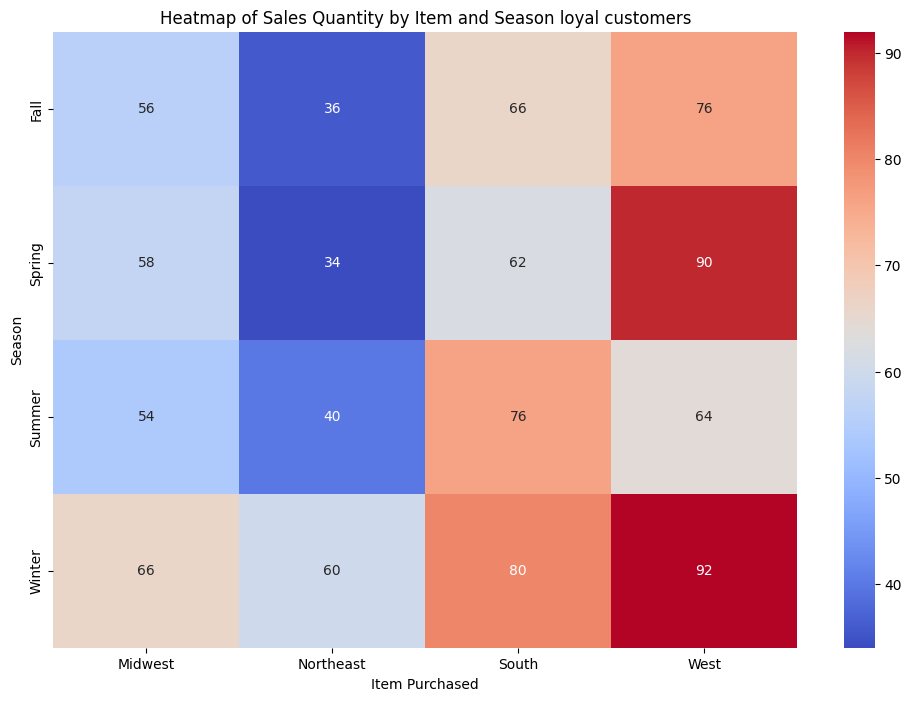

In [60]:
# Calculate the sum of quantities by season and item purchased for heatmap
melted_data = loyal_item_detailed_df.melt(id_vars=['Season', 'location_new'], var_name='Category', value_name='Quantity')
heatmap_data = melted_data.groupby(['Season', 'location_new']).count()['Quantity'].unstack(fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt="d")
plt.title('Heatmap of Sales Quantity by Item and Season loyal customers')
plt.xlabel('Item Purchased')
plt.ylabel('Season')
plt.show()


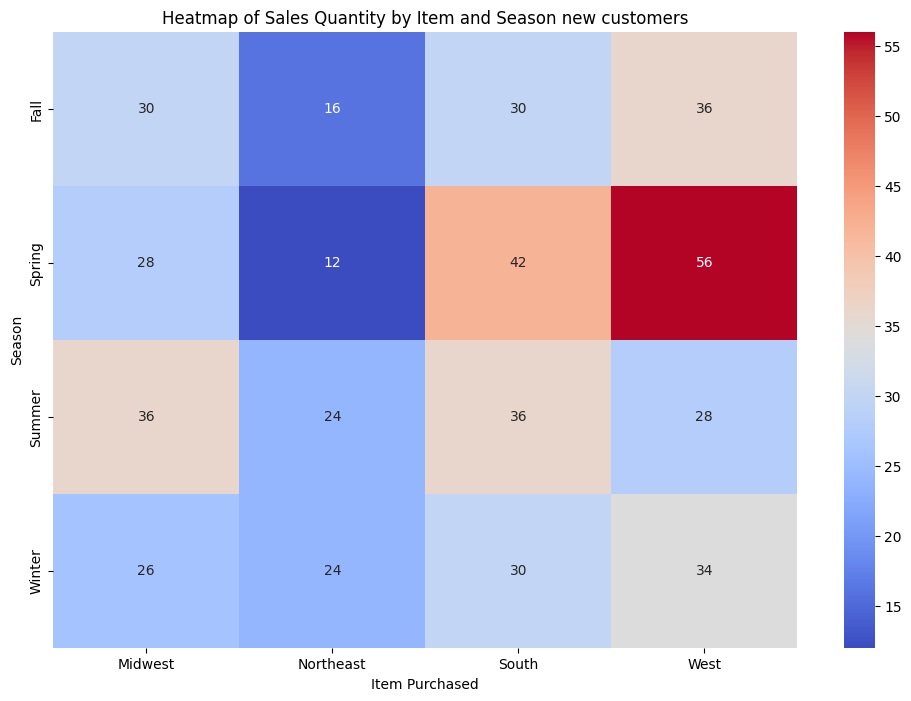

In [61]:
melted_data_new = new_item_detailed_df.melt(id_vars=['Season', 'location_new'], var_name='Category', value_name='Quantity')
heatmap_data_new = melted_data_new.groupby(['Season', 'location_new']).count()['Quantity'].unstack(fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_new, annot=True, cmap='coolwarm', fmt="d")
plt.title('Heatmap of Sales Quantity by Item and Season new customers')
plt.xlabel('Item Purchased')
plt.ylabel('Season')
plt.show()

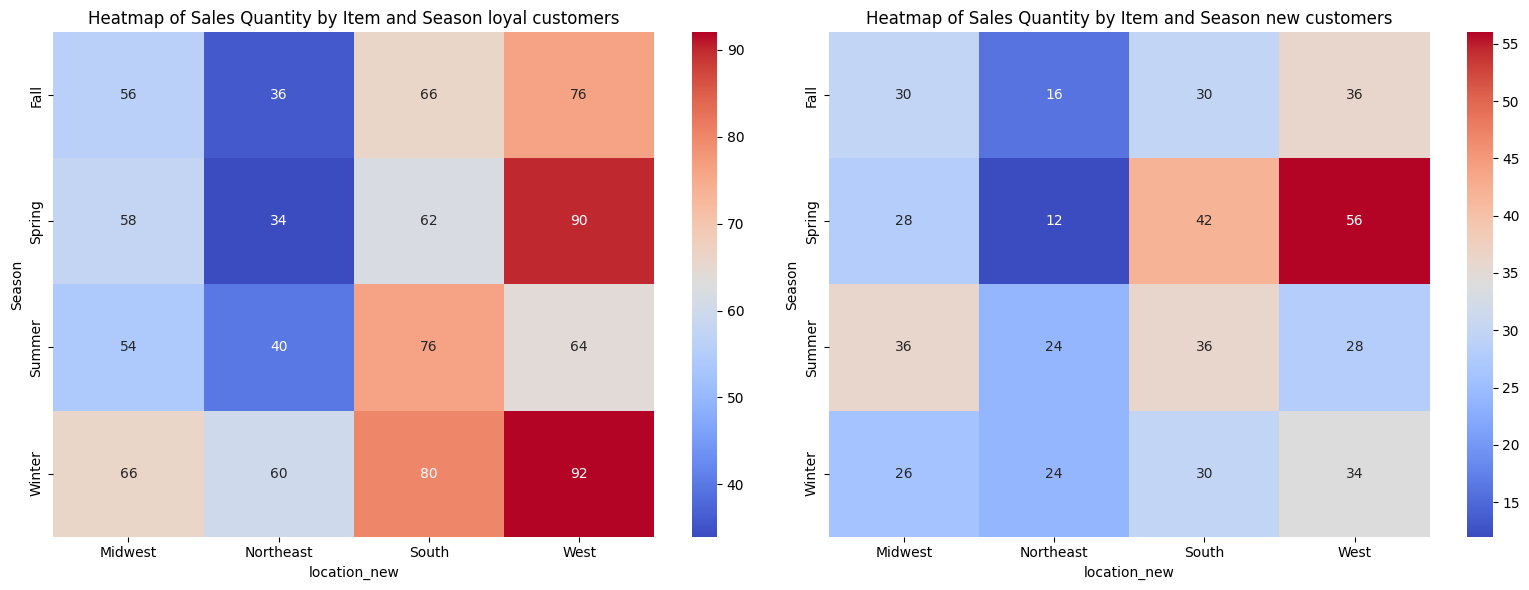

In [67]:
melted_data = loyal_item_detailed_df.melt(id_vars=['Season', 'location_new'], var_name='Category', value_name='Quantity')
heatmap_data = melted_data.groupby(['Season', 'location_new']).count()['Quantity'].unstack(fill_value=0)

melted_data_new = new_item_detailed_df.melt(id_vars=['Season', 'location_new'], var_name='Category', value_name='Quantity')
heatmap_data_new = melted_data_new.groupby(['Season', 'location_new']).count()['Quantity'].unstack(fill_value=0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 첫 번째 히트맵
sns.heatmap(heatmap_data, cmap='coolwarm', ax=ax1,  fmt="d", annot=True)
ax1.set_title('Heatmap of Sales Quantity by Item and Season loyal customers')

# 두 번째 히트맵
sns.heatmap(heatmap_data_new, cmap='coolwarm', ax=ax2,  fmt="d", annot=True)
ax2.set_title('Heatmap of Sales Quantity by Item and Season new customers')

plt.tight_layout()
plt.show()